In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency,shapiro,spearmanr
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#from sklearn.preprocessing import LabelEncode
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm  import  SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

## Charger le dataset

In [ ]:
data= pd.read_excel("/content/Base_Donnees_AVC 1.xltm")
data.head()

Genre   Age  Hypertension  Maladie_Cardiaque Situation_Matrimoniale  \
0    Male  67.0             0                  1                    Yes   
1  Female  61.0             0                  0                    Yes   
2    Male  80.0             0                  1                    Yes   
3  Female  49.0             0                  0                    Yes   
4  Female  79.0             1                  0                    Yes   

    Type_travail Residence  Taux_glucose_moyen   IMC     Statut_Fumer  AVC  
0        Private     Urban              228.69  36.6  formerly smoked    1  
1  Self-employed     Rural              202.21   NaN     never smoked    1  
2        Private     Rural              105.92  32.5     never smoked    1  
3        Private     Urban              171.23  34.4           smokes    1  
4  Self-employed     Rural              174.12  24.0     never smoked    1

#### Contexte
##### Selon l'Organisation mondiale de la santé (OMS), l'accident vasculaire cérébral (AVC) est la deuxième cause de décès dans le monde, responsable d'environ 11 % du total des décès.
##### Ce jeu de données est utilisé pour prédire si un patient est susceptible de subir un accident vasculaire cérébral (AVC) en fonction de paramètres d'entrée tels que le sexe, l'âge, diverses maladies et le tabagisme. Chaque ligne des données fournit des informations pertinentes sur le patient.
#### Description des variables
##### 1) Genre : "Homme = Male", "Femme = Female" ou "Autre".
##### 2) Age : âge du patient
##### 3) Hypertension : 0 si le patient ne souffre pas d'hypertension, 1 si le patient souffre d'hypertension.
##### 4) Maladie_cardiaque : 0 si le patient n'a pas de maladie cardiaque, 1 si le patient a une maladie cardiaque.
##### 5) Situation_matrimoniale : "Non = No" ou "Oui = Yes".
##### 6) Type_travail : "enfants = children", "Govt_jov", "Never_worked", "Private" ou "Self-employed".
##### 7) Residence : "Rural" ou "Urbain".
##### 8) Taux_glucose_moyen : taux moyen de glucose dans le sang
##### 9) IMC : indice de masse corporelle
##### 10) Statut_fumer : "anciennement fumeur = formely smokes", "jamais fumeur = never smoke", "fumeur = smokes" ou "inconnu = unknown ".
##### 11) AVC : 1 si le patient a eu un AVC ou 0 sinon


## Petite Inspection

In [ ]:
# Dimension de la base de donnée
data.shape

(5110, 11)

In [ ]:
# Information de la base de donnée
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   5110 non-null   object 
 1   Age                     5110 non-null   float64
 2   Hypertension            5110 non-null   int64  
 3   Maladie_Cardiaque       5110 non-null   int64  
 4   Situation_Matrimoniale  5110 non-null   object 
 5   Type_travail            5110 non-null   object 
 6   Residence               5110 non-null   object 
 7   Taux_glucose_moyen      5110 non-null   float64
 8   IMC                     4909 non-null   float64
 9   Statut_Fumer            5110 non-null   object 
 10  AVC                     5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Corriger quelques incoherences ou erreurs

In [ ]:
## Transformation de certains types de variables
data['Maladie_Cardiaque'] = data['Maladie_Cardiaque'].astype('category')

data['Hypertension'] = data['Hypertension'].astype('category')

data['AVC'] = data['AVC'].astype('category')

In [ ]:
data.duplicated().sum()

np.int64(0)

##### Il n'esxiste pas de duplication  dans la base de donnée

In [ ]:
data.head()

Genre   Age Hypertension Maladie_Cardiaque Situation_Matrimoniale  \
0    Male  67.0            0                 1                    Yes   
1  Female  61.0            0                 0                    Yes   
2    Male  80.0            0                 1                    Yes   
3  Female  49.0            0                 0                    Yes   
4  Female  79.0            1                 0                    Yes   

    Type_travail Residence  Taux_glucose_moyen   IMC     Statut_Fumer AVC  
0        Private     Urban              228.69  36.6  formerly smoked   1  
1  Self-employed     Rural              202.21   NaN     never smoked   1  
2        Private     Rural              105.92  32.5     never smoked   1  
3        Private     Urban              171.23  34.4           smokes   1  
4  Self-employed     Rural              174.12  24.0     never smoked   1

In [ ]:
data['AVC'].value_counts()

AVC
0    4861
1     249
Name: count, dtype: int64

In [ ]:
data['Statut_Fumer'].value_counts()

Statut_Fumer
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

##### Pour la variable statut fumer ya des valeurs non renseigner nous allons les transformer en NAN ensuite les traiter

In [ ]:
## Valeur manquante
data.isnull().sum()

Genre                       0
Age                         0
Hypertension                0
Maladie_Cardiaque           0
Situation_Matrimoniale      0
Type_travail                0
Residence                   0
Taux_glucose_moyen          0
IMC                       201
Statut_Fumer                0
AVC                         0
dtype: int64

##### Il existe des valeurs manquantes sur les variables IMC et le statut des fumeur



```
# Ce texte est au format code
```

## Analyse exploratoire Avant prétraitement des données

In [ ]:
# Séparation des variables selon leur type
data_numeriques = data.select_dtypes(include=['int64', 'float64'])
data_categorielles = data.select_dtypes(include=['object', 'category'])

### Pour les variables numériques

In [ ]:
## Résume descriptif
data.describe(include="number").T

count        mean        std    min     25%     50%  \
Age                 5110.0   43.226614  22.612647   0.08  25.000  45.000   
Taux_glucose_moyen  5110.0  106.147677  45.283560  55.12  77.245  91.885   
IMC                 4909.0   28.893237   7.854067  10.30  23.500  28.100   

                       75%     max  
Age                  61.00   82.00  
Taux_glucose_moyen  114.09  271.74  
IMC                  33.10   97.60

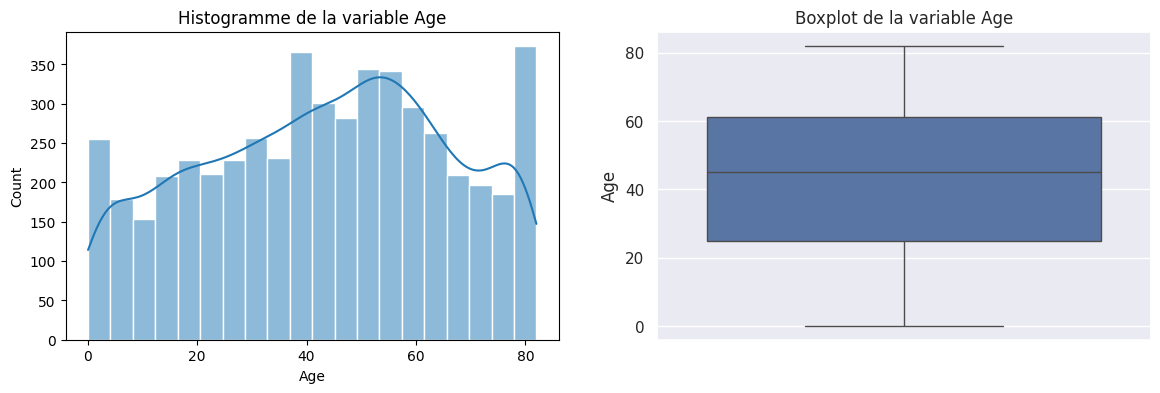

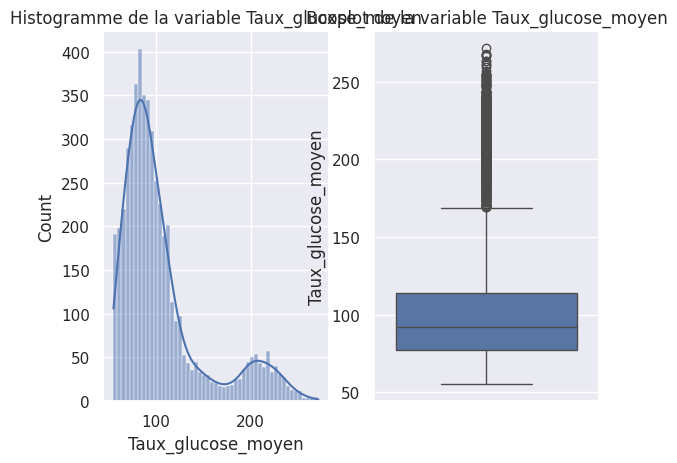

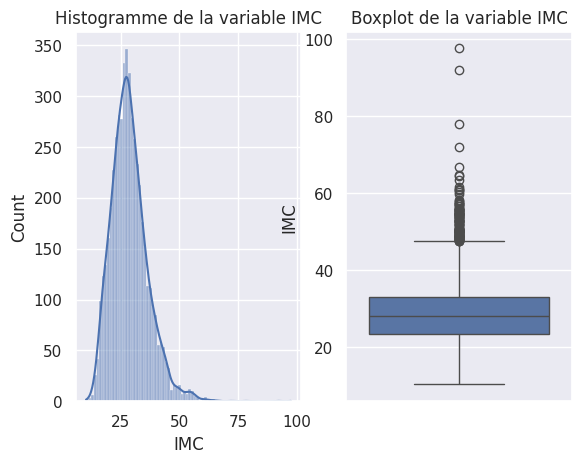

In [ ]:
plt.figure(figsize=(14,4))
for col in data_numeriques.columns:
    plt.subplot(121)
    sns.set_theme(style="darkgrid")
    sns.histplot(data=data,x=col,kde=True)
    plt.title(f'Histogramme de la variable {col}')
    plt.subplot(122)
    sns.boxplot(data[col])
    plt.title(f'Boxplot de la variable {col}')
    plt.show()

In [ ]:
for col in data_numeriques.columns:
    print(f"Skewness de la variable {col}: {data[col].skew():.2f}")
    print(f"Kurtosis de la variable {col}: {data[col].kurt():.2f}")


Skewness de la variable Age: -0.14
Kurtosis de la variable Age: -0.99
Skewness de la variable Taux_glucose_moyen: 1.57
Kurtosis de la variable Taux_glucose_moyen: 1.68
Skewness de la variable IMC: 1.06
Kurtosis de la variable IMC: 3.36


#### test de normalité (Shapiro-Wilk)

In [ ]:
for col in data_numeriques.columns:
    stat, p_value = shapiro(data[col].sample(500, random_state=42))

    if p_value < 0.05:
            print(f"La variable {col} ne suit pas la loi normale (p-value = {p_value})")
    else:
            print(f"La variable {col} suit la loi normale (p-value = {p_value})")

La variable Age ne suit pas la loi normale (p-value = 6.400304511076399e-09)
La variable Taux_glucose_moyen ne suit pas la loi normale (p-value = 2.3073166356644035e-25)
La variable IMC suit la loi normale (p-value = nan)


In [ ]:
for col in data_numeriques.columns:
    stat, p_value = shapiro(data[col])

    if p_value < 0.05:
            print(f"La variable {col} ne suit pas la loi normale (p-value = {p_value})")
    else:
            print(f"La variable {col} suit la loi normale (p-value = {p_value})")

La variable Age ne suit pas la loi normale (p-value = 1.3789355302240572e-32)
La variable Taux_glucose_moyen ne suit pas la loi normale (p-value = 1.795389063729762e-61)
La variable IMC suit la loi normale (p-value = nan)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5110.
  res = hypotest_fun_out(*samples, **kwds)


#### Pour les variables catégorielles

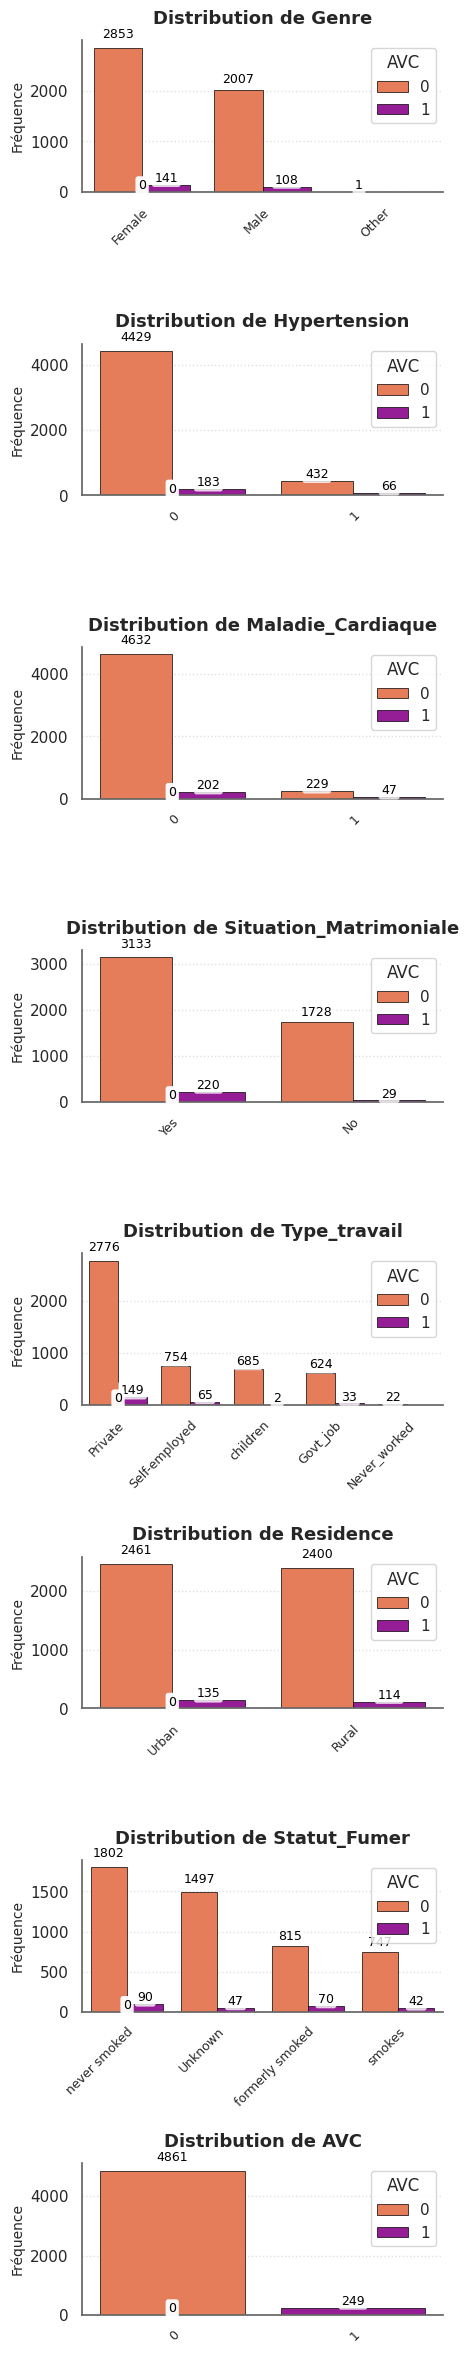

In [ ]:
plt.figure(figsize=(5, 24))
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.4'})

for i, col in enumerate(data_categorielles.columns, 1):
    plt.subplot(len(data_categorielles.columns), 1, i)

    # Tri par fréquence
    order = data_categorielles[col].value_counts(dropna=False).index

    ax = sns.countplot(
        x=col,
        data=data_categorielles,
        hue = "AVC",
        order=order,
        palette='plasma_r',
        edgecolor='black',
        linewidth=0.5,
        saturation=0.9
    )

    # Annotations optimisées
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

    # Paramètres esthétiques
    plt.title(f'Distribution de {col}', pad=12, fontsize=13, fontweight='semibold')
    plt.ylabel('Fréquence', fontsize=10)
    plt.xlabel('', fontsize=0)  # Suppression totale de l'axe X

    # Rotation et alignement des ticks
    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=9,
        rotation_mode='anchor'  # Meilleur alignement
    )

    # Décoration des axes
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout(pad=2.0)  # Réduction de l'espacement
plt.subplots_adjust(hspace=1)  # Espace vertical entre les subplots
plt.show()


In [ ]:
# prompt: met en commentaire la cellule precedente

#import matplotlib.pyplot as plt
#plt.figure(figsize=(20, 16))
#sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.4'})

## Dictionnaire de renommage des variables
#noms_variables = {
#    'Hypertension': 'Hypertension', # Renommer Hypertension
#    'AVC': 'Accident Vasculaire Cérébral',
#    'Maladie_Cardiaque': 'Maladie Cardiaque', # Renommer Maladie_Cardiaque
#    'Situation_Matrimoniale': 'Situation Matrimoniale'
#}

## Dictionnaire de renommage des modalités
#noms_modalites = {
#    0: 'Non',
#    1: 'Oui',
#    '0': 'Non',
#    '1': 'Oui',
#
#}

## Variables à traiter spécifiquement (en utilisant les noms de colonnes originaux)
#variables_binaires = ['Hypertension', 'AVC', 'Maladie_Cardiaque']

## Disposition des graphiques
#n_cols = 4
#n_rows = (len(data_categorielles.columns) + n_cols - 1) // n_cols

#for i, col in enumerate(data_categorielles.columns, 1):
#    plt.subplot(n_rows, n_cols, i)
#
#    # Copie des données avec conversion des modalités
#    temp_data = data_categorielles.copy()
#
#    # Application du renommage pour les variables binaires
#    if col in variables_binaires:
#        # Assurez-vous que la colonne est du type str avant de remplacer les modalités
#        temp_data[col] = temp_data[col].astype(str).replace(noms_modalites)
#
#    # Tri par fréquence
#    order = temp_data[col].value_counts(dropna=False).index
#
#    # Gestion de la variable hue (AVC) - utilisez le nom de colonne original
#    hue_var = "AVC" if col != "AVC" else None
#    if hue_var:
#        # Appliquer le renommage des modalités au hue_var
#        temp_data[hue_var] = temp_data[hue_var].astype(str).replace(noms_modalites)
#
#    # Création du graphique
#    ax = sns.countplot(
#        x=col,
#        data=temp_data,
#        hue=hue_var, # Utiliser le nom de colonne original
#        order=order,
#        palette='plasma_r',
#        edgecolor='black',
#        linewidth=0.5,
#        saturation=0.9
#    )

#    # Annotations
#    for p in ax.patches:
#        height = p.get_height()
#        ax.text(
#            p.get_x() + p.get_width()/2,
#            height + max(height*0.05, 0.5),
#            f'{int(height)}',
#            ha='center',
#            va='bottom',
#            fontsize=9,
#            color='black',
#            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
#        )

#    # Titre avec nom de variable renommé
#    title = noms_variables.get(col, col) # Utiliser le nom de colonne original pour chercher dans le dict
#    plt.title(f'Distribution de {title}', pad=12, fontsize=13, fontweight='semibold')
#
#    # Axes
#    plt.ylabel('Fréquence', fontsize=10)
#    plt.xlabel('')
#    plt.xticks(rotation=45, ha='right', fontsize=9, rotation_mode='anchor')
#
#    # Légende
#    if ax.legend_:
#        handles, labels = ax.get_legend_handles_labels()
#        # Appliquer le renommage des modalités aux labels de la légende
#        new_labels = [noms_modalites.get(l, l) for l in labels]
#        ax.legend(handles, new_labels, title=noms_variables.get("AVC", "AVC")) # Utiliser le nom de colonne original pour le titre de la légende

#    ax.spines[['top', 'right']].set_visible(False)
#    ax.grid(axis='y', linestyle=':', alpha=0.6)

## Ajustement final
#plt.tight_layout(pad=3.0)
#plt.subplots_adjust(hspace=0.5, wspace=0.3)
#plt.show()


In [ ]:
def analyse_variable_categorielle(col, df=data, rotate_xticks=True, max_categories=10):
    # Calcul des effectifs et pourcentages
    freq_table = df[col].value_counts()
    percent_table = round(freq_table / freq_table.sum() * 100, 2)
    stats_df = pd.DataFrame({'Effectifs': freq_table, 'Pourcentages (%)': percent_table})


    # Affichage du tableau
    print(f"\n--- {col.upper()} ---")
    display(stats_df)
    # Ajustement du nombre de catégories affichées
    top_categories = freq_table[:max_categories]






    # Affichage du tableau
    print(f"\n--- {col.upper()} ---")
    display(stats_df)
    # Ajustement du nombre de catégories affichées
    top_categories = freq_table[:max_categories]


In [ ]:
 for var in data_categorielles:
    analyse_variable_categorielle(var)


--- GENRE ---


Effectifs  Pourcentages (%)
Genre                              
Female       2994             58.59
Male         2115             41.39
Other           1              0.02


--- GENRE ---


Effectifs  Pourcentages (%)
Genre                              
Female       2994             58.59
Male         2115             41.39
Other           1              0.02


--- HYPERTENSION ---


Effectifs  Pourcentages (%)
Hypertension                             
0                  4612             90.25
1                   498              9.75


--- HYPERTENSION ---


Effectifs  Pourcentages (%)
Hypertension                             
0                  4612             90.25
1                   498              9.75


--- MALADIE_CARDIAQUE ---


Effectifs  Pourcentages (%)
Maladie_Cardiaque                             
0                       4834              94.6
1                        276               5.4


--- MALADIE_CARDIAQUE ---


Effectifs  Pourcentages (%)
Maladie_Cardiaque                             
0                       4834              94.6
1                        276               5.4


--- SITUATION_MATRIMONIALE ---


Effectifs  Pourcentages (%)
Situation_Matrimoniale                             
Yes                          3353             65.62
No                           1757             34.38


--- SITUATION_MATRIMONIALE ---


Effectifs  Pourcentages (%)
Situation_Matrimoniale                             
Yes                          3353             65.62
No                           1757             34.38


--- TYPE_TRAVAIL ---


Effectifs  Pourcentages (%)
Type_travail                              
Private             2925             57.24
Self-employed        819             16.03
children             687             13.44
Govt_job             657             12.86
Never_worked          22              0.43


--- TYPE_TRAVAIL ---


Effectifs  Pourcentages (%)
Type_travail                              
Private             2925             57.24
Self-employed        819             16.03
children             687             13.44
Govt_job             657             12.86
Never_worked          22              0.43


--- RESIDENCE ---


Effectifs  Pourcentages (%)
Residence                             
Urban           2596              50.8
Rural           2514              49.2


--- RESIDENCE ---


Effectifs  Pourcentages (%)
Residence                             
Urban           2596              50.8
Rural           2514              49.2


--- STATUT_FUMER ---


Effectifs  Pourcentages (%)
Statut_Fumer                                
never smoked          1892             37.03
Unknown               1544             30.22
formerly smoked        885             17.32
smokes                 789             15.44


--- STATUT_FUMER ---


Effectifs  Pourcentages (%)
Statut_Fumer                                
never smoked          1892             37.03
Unknown               1544             30.22
formerly smoked        885             17.32
smokes                 789             15.44


--- AVC ---


Effectifs  Pourcentages (%)
AVC                             
0         4861             95.13
1          249              4.87


--- AVC ---


Effectifs  Pourcentages (%)
AVC                             
0         4861             95.13
1          249              4.87

## Préprocessing

### Gestion des valeurs manquantes

#### Pour la variable IMC

In [ ]:
# Calcul de l'écart-type pour la colonne IMC
ecart_type = data['IMC'].std()
print(f"Écart-type de l'IMC : {ecart_type:.2f}")


Écart-type de l'IMC : 7.85


##### Nous constatons que la distribution de la variable IMC suit la loi normal et que l'ecart types n'est pas grand alors la série n'est pas trop dispersé autour de sa moyenne.De plus la moyenne est sensiblement égale à la médiane alors la moyenne peut être un bon indicateur pour l'imputation

In [ ]:
## Imputation par la moyenne
moy = data['IMC'].mean()
data['IMC'] = data['IMC'].fillna(moy)

#### Pour la variable statut fumeur

In [ ]:
data['Statut_Fumer'] =  data['Statut_Fumer'].replace('Unknown', np.nan)
data['Statut_Fumer'].value_counts()

Statut_Fumer
never smoked       1892
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

Genre                        0
Age                          0
Hypertension                 0
Maladie_Cardiaque            0
Situation_Matrimoniale       0
Type_travail                 0
Residence                    0
Taux_glucose_moyen           0
IMC                          0
Statut_Fumer              1544
AVC                          0
dtype: int64

In [ ]:
# Calculer le mode  pour cette variables
mode = data['Statut_Fumer'].mode()[0]

print(f"Mode de la variable statut fumeur : {mode}")


Mode de la variable statut fumeur : never smoked


In [ ]:
## Imputation par le mode
data['Statut_Fumer'] = data['Statut_Fumer'].fillna(mode)

In [ ]:
data.isnull().sum()

Genre                     0
Age                       0
Hypertension              0
Maladie_Cardiaque         0
Situation_Matrimoniale    0
Type_travail              0
Residence                 0
Taux_glucose_moyen        0
IMC                       0
Statut_Fumer              0
AVC                       0
dtype: int64

### Gestion des valeurs abberantes

In [ ]:
def replace_outliers_in_columns(df, columns, method="median"):
    df_cleaned = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if method == "median":
            replacement_value = df[col].median()
        elif method == "mean":
            replacement_value = df[col].mean()

        if method in ["median", "mean"]:
            df_cleaned[col] = df[col].apply(
                lambda x: replacement_value if x < lower or x > upper else x
            )
        elif method == "bounds":
            df_cleaned[col] = df[col].apply(
                lambda x: lower if x < lower else upper if x > upper else x
            )
        else:
            raise ValueError("Méthode inconnue : utiliser 'mean', 'median' ou 'bounds'")

    return df_cleaned

In [ ]:
df= replace_outliers_in_columns(data, ["Age", "Taux_glucose_moyen", "IMC" ], method="bounds")

## Analyse exploratoire aprés prétraitement des données

### Analyse univarié

In [ ]:
## Résumé descriptif
df.describe().T

count        mean        std    min     25%     50%  \
Age                 5110.0   43.226614  22.612647   0.08  25.000  45.000   
Taux_glucose_moyen  5110.0  100.996204  33.214738  55.12  77.245  91.885   
IMC                 5110.0   28.721613   7.119940  10.30  23.800  28.400   

                       75%       max  
Age                  61.00   82.0000  
Taux_glucose_moyen  114.09  169.3575  
IMC                  32.80   46.3000

In [ ]:
#Séparation des variables
df_numeriques = df.select_dtypes(include=['int64', 'float64'])
df_categorielles = df.select_dtypes(include=['object', 'category'])

#### Pour les variables numériques

In [ ]:
for col in df_numeriques.columns:
    print(f"Skewness de la variable {col}: {df[col].skew():.2f}")
    print(f"Kurtosis de la variable {col}: {df[col].kurt():.2f}")


Skewness de la variable Age: -0.14
Kurtosis de la variable Age: -0.99
Skewness de la variable Taux_glucose_moyen: 0.94
Kurtosis de la variable Taux_glucose_moyen: -0.17
Skewness de la variable IMC: 0.44
Kurtosis de la variable IMC: -0.08


#### Test de normalité

In [ ]:
for col in df_numeriques.columns:
    stat, p_value = shapiro(df[col].sample(500, random_state=42))

    if p_value < 0.05:
            print(f"La variable {col} ne suit pas la loi normale (p-value = {p_value})")
    else:
            print(f"La variable {col} suit la loi normale (p-value = {p_value})")

La variable Age ne suit pas la loi normale (p-value = 6.400304511076399e-09)
La variable Taux_glucose_moyen ne suit pas la loi normale (p-value = 3.115839080369874e-20)
La variable IMC ne suit pas la loi normale (p-value = 7.104313222108549e-07)


#### Pour les variables catégorielles

In [ ]:
# Tableau de résumé
df.describe(include=['category', 'object']).T

count unique           top  freq
Genre                   5110      3        Female  2994
Hypertension            5110      2             0  4612
Maladie_Cardiaque       5110      2             0  4834
Situation_Matrimoniale  5110      2           Yes  3353
Type_travail            5110      5       Private  2925
Residence               5110      2         Urban  2596
Statut_Fumer            5110      3  never smoked  3436
AVC                     5110      2             0  4861

/tmp/ipython-input-38-2017314915.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-38-2017314915.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-38-2017314915.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-38-2017314915.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-3

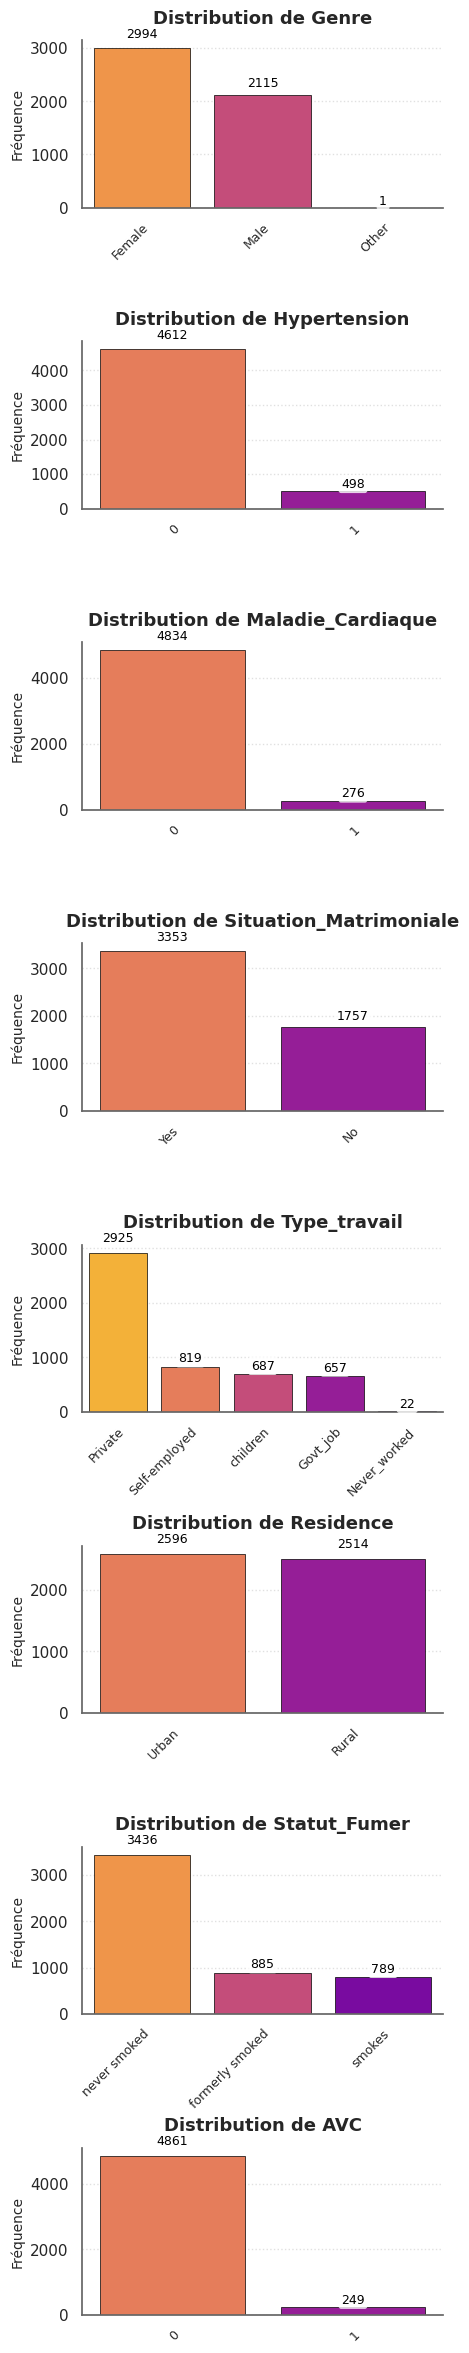

In [ ]:
plt.figure(figsize=(5, 24))
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.4'})

for i, col in enumerate(df_categorielles.columns, 1):
    plt.subplot(len(df_categorielles.columns), 1, i)

    # Tri par fréquence
    order = df_categorielles[col].value_counts(dropna=False).index

    ax = sns.countplot(
        x=col,
        data=df_categorielles,
        order=order,
        palette='plasma_r',
        edgecolor='black',
        linewidth=0.5,
        saturation=0.9
    )

    # Annotations optimisées
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

    # Paramètres esthétiques
    plt.title(f'Distribution de {col}', pad=12, fontsize=13, fontweight='semibold')
    plt.ylabel('Fréquence', fontsize=10)
    plt.xlabel('', fontsize=0)  # Suppression totale de l'axe X

    # Rotation et alignement des ticks
    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=9,
        rotation_mode='anchor'  # Meilleur alignement
    )

    # Décoration des axes
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout(pad=2.0)  # Réduction de l'espacement
plt.subplots_adjust(hspace=0.8)  # Espace vertical entre les subplots
plt.show()


/tmp/ipython-input-39-2384190622.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-39-2384190622.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-39-2384190622.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-39-2384190622.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-3

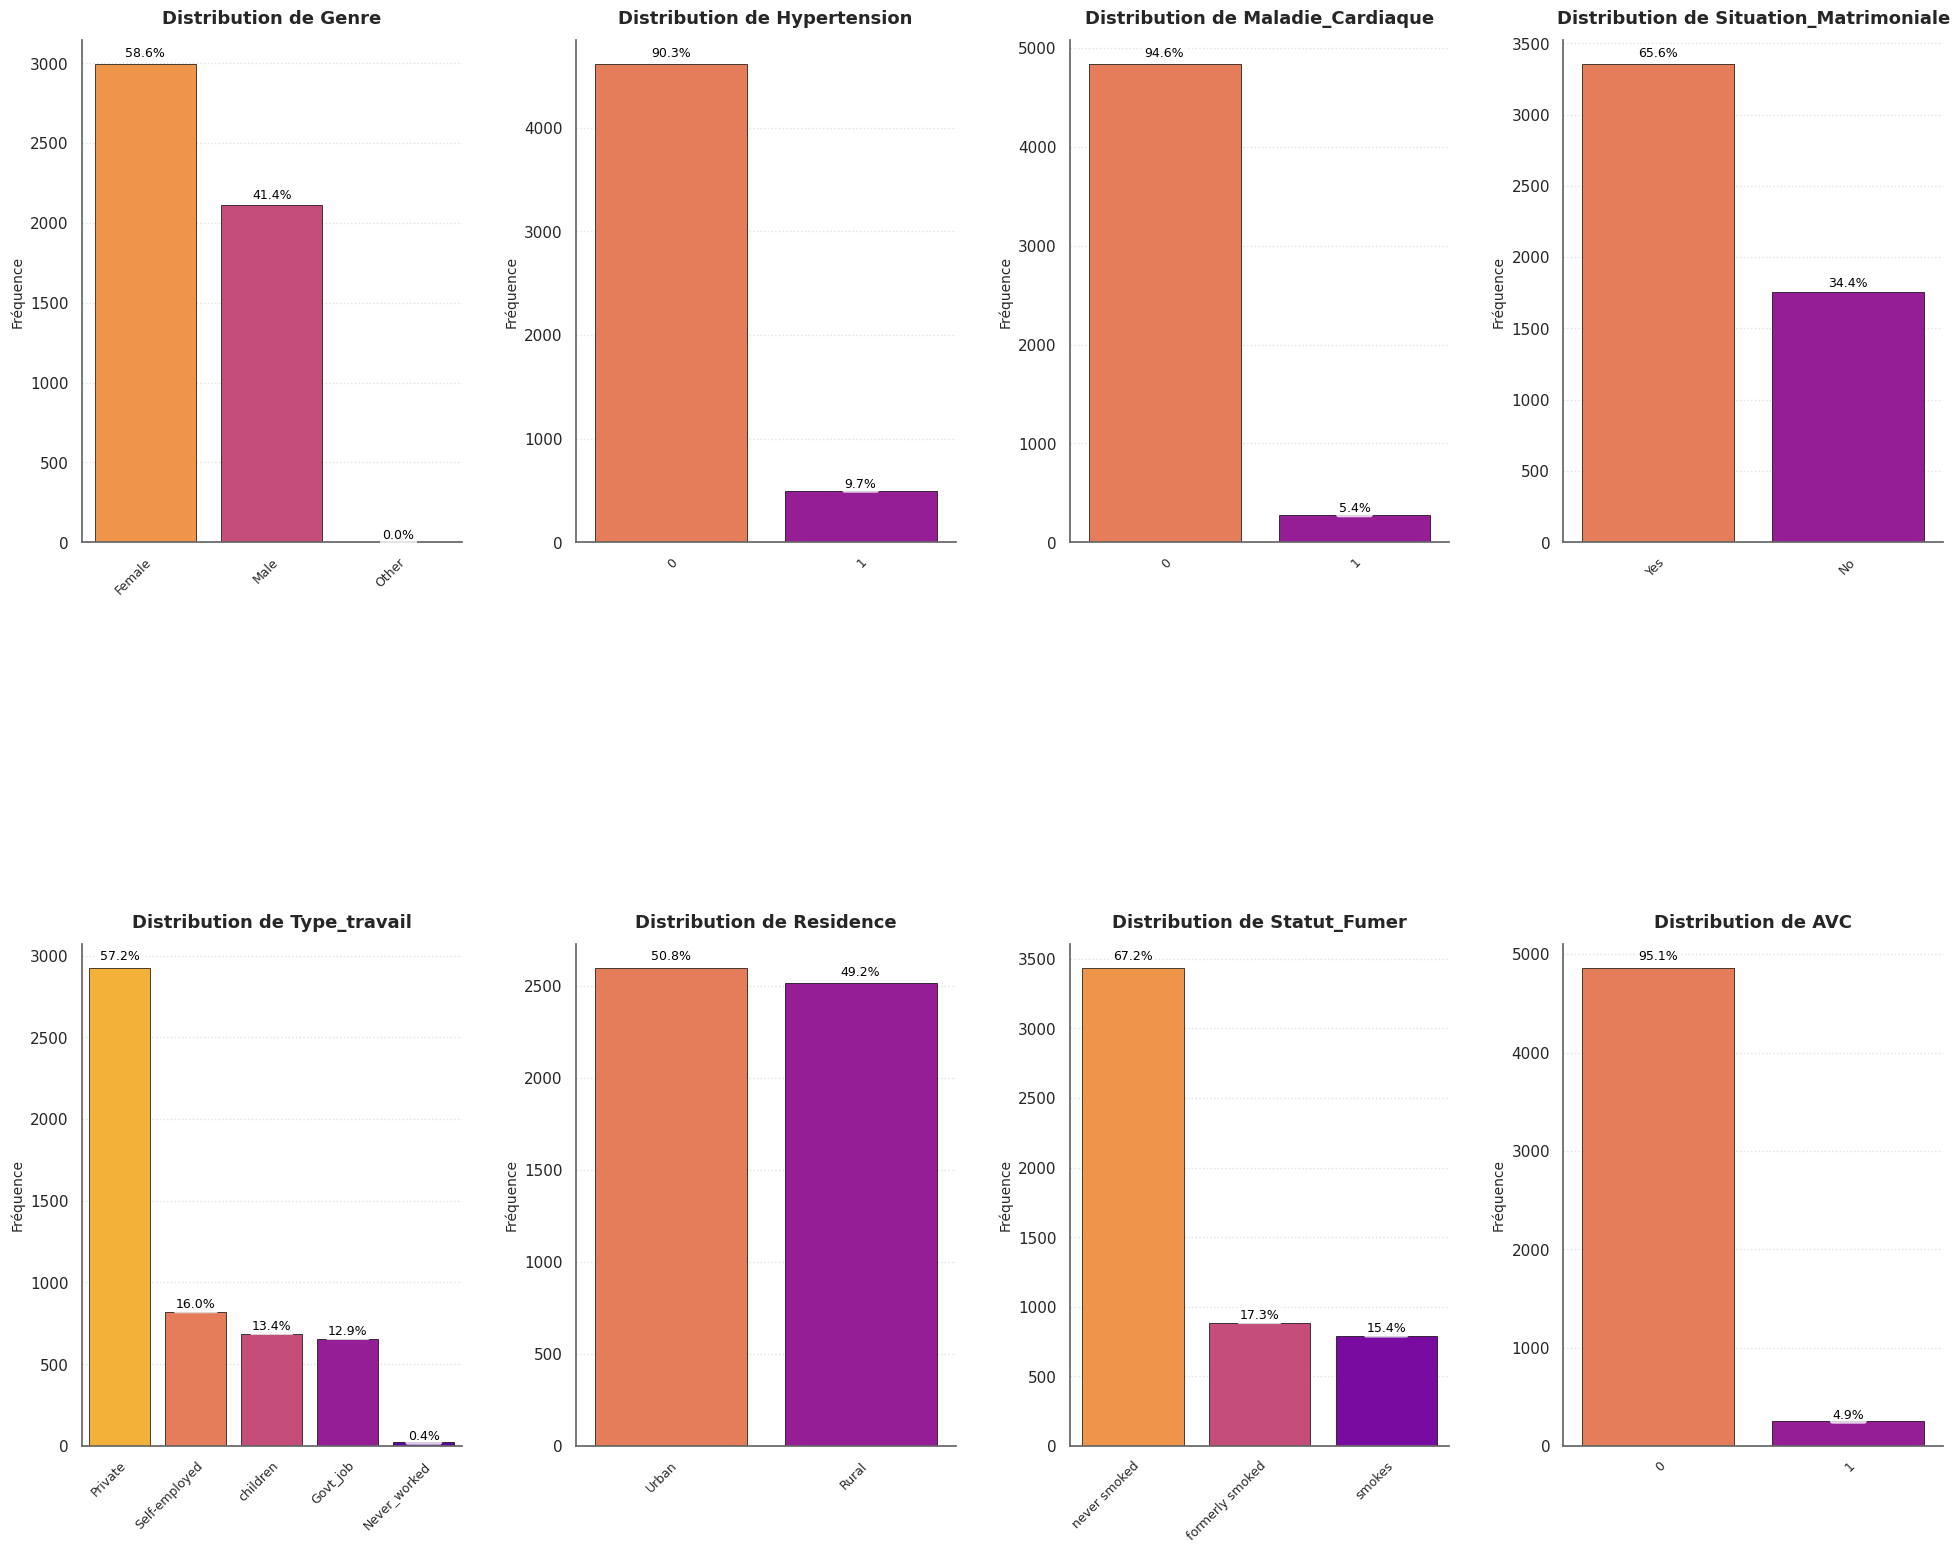

In [ ]:
# prompt: pour ce code suivant met 4 graphe en haut et 4 en bas et mets le pourcentage au lieu des nombre plt.figure(figsize=(5, 24))
# sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.4'})
# for i, col in enumerate(df_categorielles.columns, 1):
#     plt.subplot(len(df_categorielles.columns), 1, i)
#     # Tri par fréquence
#     order = df_categorielles[col].value_counts(dropna=False).index
#     ax = sns.countplot(
#         x=col,
#         data=df_categorielles,
#         order=order,
#         palette='plasma_r',
#         edgecolor='black',
#         linewidth=0.5,
#         saturation=0.9
#     )
#     # Annotations optimisées
#     for p in ax.patches:
#         height = p.get_height()
#         ax.text(
#             p.get_x() + p.get_width()/2,
#             height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
#             f'{int(height)}',
#             ha='center',
#             va='bottom',
#             fontsize=9,
#             color='black',
#             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
#         )
#     # Paramètres esthétiques
#     plt.title(f'Distribution de {col}', pad=12, fontsize=13, fontweight='semibold')
#     plt.ylabel('Fréquence', fontsize=10)
#     plt.xlabel('', fontsize=0)  # Suppression totale de l'axe X
#     # Rotation et alignement des ticks
#     plt.xticks(
#         rotation=45,
#         ha='right',
#         fontsize=9,
#         rotation_mode='anchor'  # Meilleur alignement
#     )
#     # Décoration des axes
#     ax.spines[['top', 'right']].set_visible(False)
#     ax.grid(axis='y', linestyle=':', alpha=0.6)
# plt.tight_layout(pad=2.0)  # Réduction de l'espacement
# plt.subplots_adjust(hspace=0.8)  # Espace vertical entre les subplots
# plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16)) # Augmentation de la taille pour 8 graphiques
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.4'})

n_cols = 4 # 4 colonnes
n_rows = (len(df_categorielles.columns) + n_cols - 1) // n_cols # Calcul dynamique du nombre de lignes

for i, col in enumerate(df_categorielles.columns, 1):
    plt.subplot(n_rows, n_cols, i) # Disposition en 4xN (N lignes)

    # Tri par fréquence
    value_counts = df_categorielles[col].value_counts(dropna=False)
    total = value_counts.sum()
    order = value_counts.index

    ax = sns.countplot(
        x=col,
        data=df_categorielles,
        order=order,
        palette='plasma_r',
        edgecolor='black',
        linewidth=0.5,
        saturation=0.9
    )

    # Annotations en pourcentage
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{(height / total) * 100:.1f}%' # Calcul du pourcentage

        ax.text(
            p.get_x() + p.get_width()/2,
            height + max(height*0.01, 0.5),  # Adaptation dynamique à la hauteur, moins de décalage
            percentage,
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

    # Paramètres esthétiques
    plt.title(f'Distribution de {col}', pad=12, fontsize=13, fontweight='semibold')
    plt.ylabel('Fréquence', fontsize=10) # On garde "Fréquence" sur l'axe Y, les pourcentages sont les annotations
    plt.xlabel('', fontsize=0)

    # Rotation et alignement des ticks
    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=9,
        rotation_mode='anchor'
    )

    # Décoration des axes
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle=':', alpha=0.6)


plt.tight_layout(pad=2.0)  # Réduction de l'espacement
plt.subplots_adjust(hspace=0.8, wspace=0.3) # Ajuster l'espace vertical et horizontal
plt.show()


### Analyse descriptive bivariée

#### Tache à faire
##### 1. Voir graphiquement la relation des variables par rapport à la variable target
##### 2. Faire un test de d'indépendance de khi-deux entre chaque variable et la variable target
##### 3. Faire un test d'independance de khi-deux
##### 4. Matrice de corrélation
##### 5. Nuage de point entre les variables

#### Entre Variable quantitative

##### Nuage de point

<Figure size 1000x1000 with 0 Axes>

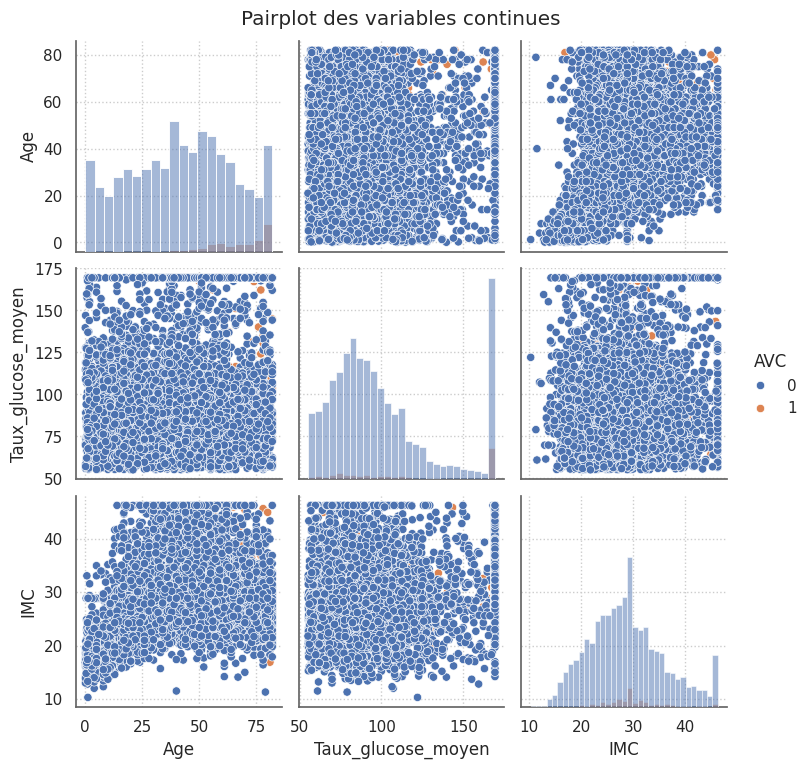

In [ ]:
# pair plot des variables continues
plt.figure(figsize = (10,10))
sns.pairplot(data = df,hue = "AVC",diag_kind = 'hist')
plt.suptitle('Pairplot des variables continues', y=1.02)
plt.show( )

#### Corrélations entre variables numériques

/tmp/ipython-input-41-2124487701.py:10: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


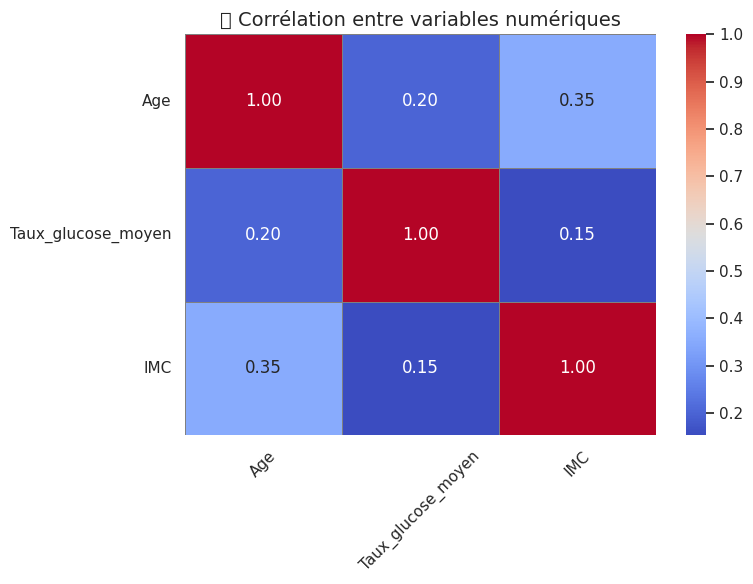

In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = df_numeriques.corr()

# Affichage du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("📌 Corrélation entre variables numériques", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Test de corrélation (spearman)

In [ ]:
def compute_significant_spearman_correlations(data, alpha=0.05):
    df_numeriquesss = data.select_dtypes(include=["int64", "float64"]).columns
    results = []

    for i, col1 in enumerate(df_numeriquesss):
        for col2 in df_numeriquesss[i+1:]:
            corr, p = spearmanr(data[col1], data[col2])
            if p < alpha:
                results.append({
                    "Variable 1": col1,
                    "Variable 2": col2,
                    "Corrélation": round(corr, 2),
                    "p-value": round(p, 4)
                })
            elif p >= alpha: # Ajout du elif pour inclure toutes les corrélations
                 results.append({
                    "Variable 1": col1,
                    "Variable 2": col2,
                    "Corrélation": round(corr, 2),
                    "p-value": round(p, 4)})

    return pd.DataFrame(results).sort_values(by="Corrélation", key=abs, ascending=False)

In [ ]:
# Appel à la fonction apllique à nos df
significant_spearman_corrs = compute_significant_spearman_correlations(df_numeriques)
display(significant_spearman_corrs)

Variable 1          Variable 2  Corrélation  p-value
1                 Age                 IMC         0.36      0.0
0                 Age  Taux_glucose_moyen         0.14      0.0
2  Taux_glucose_moyen                 IMC         0.11      0.0

#####  Toutes les p-values sont  < 0.05, ce qui indique que toutes les corrélations sont statistiquement significatives.
##### Age est modérément lié à l’IMC et faiblement au taux de glucose moyen.
##### IMC et taux de glucose moyen sont faiblement associés.

#### Entre variable catégorielle

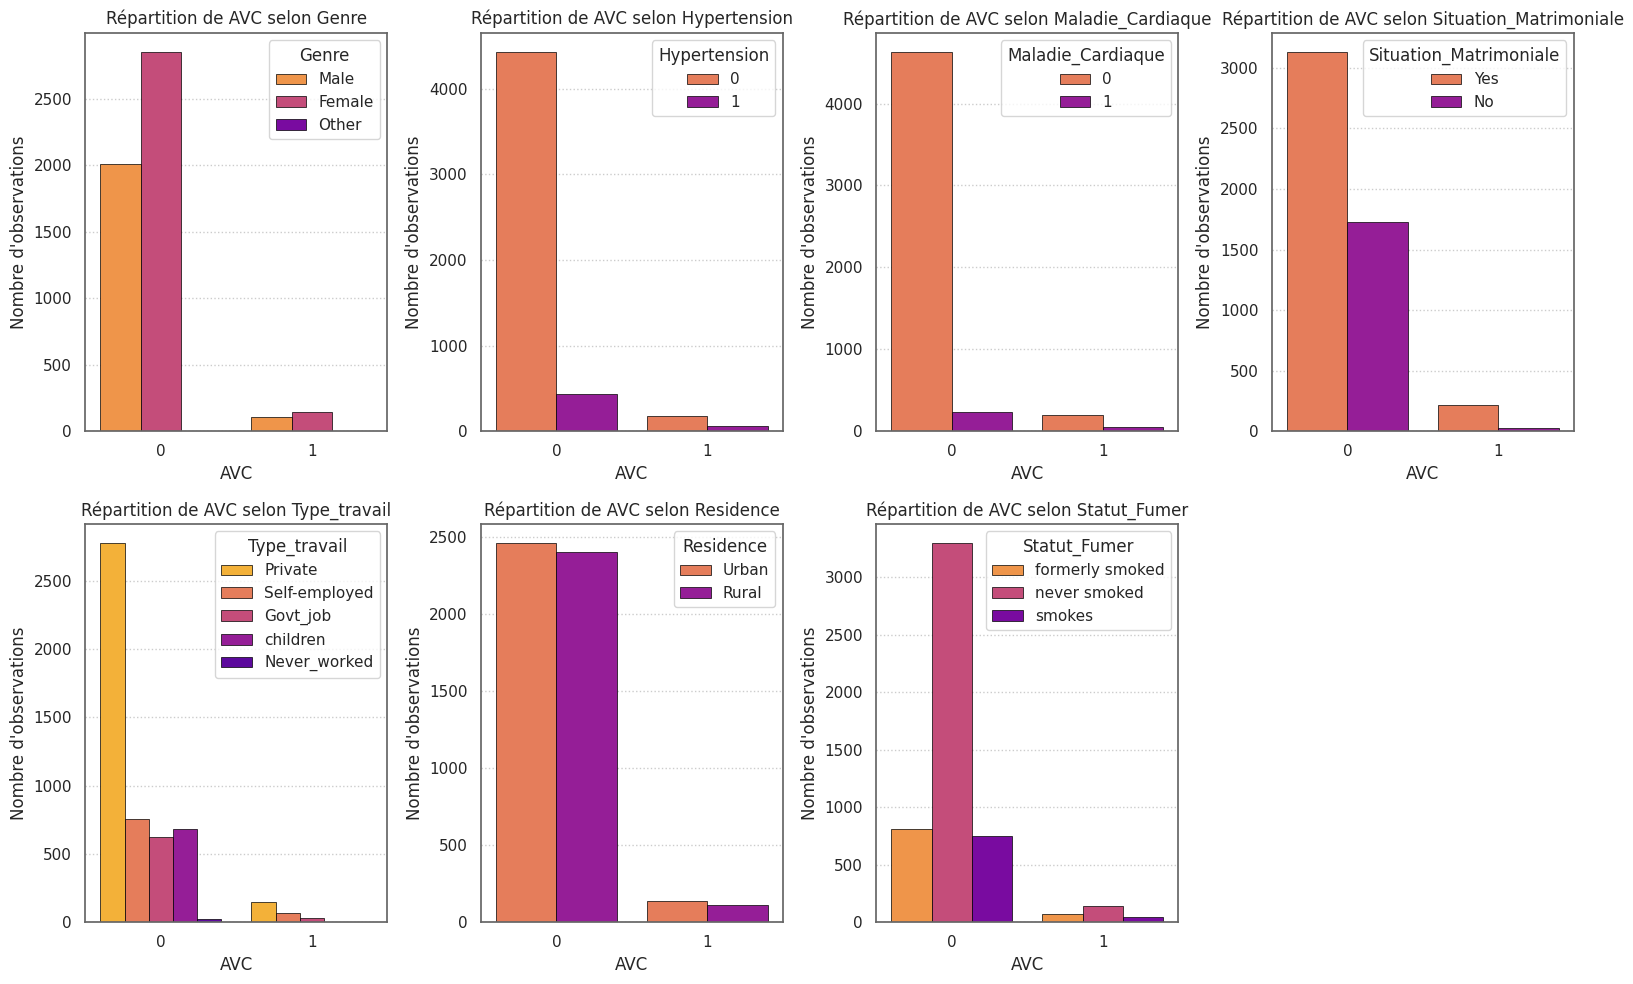

In [ ]:
cat_vars = ['Genre', 'Hypertension', 'Maladie_Cardiaque', 'Situation_Matrimoniale',
            'Type_travail', 'Residence', 'Statut_Fumer']

plt.figure(figsize=(16, 10))  # Ajustez la hauteur selon vos besoins

# Première ligne avec 4 graphiques
for i, var in enumerate(cat_vars[:4], 1):
    plt.subplot(2, 4, i)  # 2 lignes, 4 colonnes, position i
    sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
                  edgecolor='black',
                  linewidth=0.5,
                  saturation=0.9)
    plt.title(f"Répartition de AVC selon {var}")
    plt.xlabel("AVC")
    plt.ylabel("Nombre d'observations")
    plt.legend(title=var, loc='upper right')

# Deuxième ligne avec 3 graphiques (centrés)
for i, var in enumerate(cat_vars[4:], 5):  # Commence à la position 5
    plt.subplot(2, 4, i)  # 2 lignes, 4 colonnes, positions 5,6,7
    sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
                  edgecolor='black',
                  linewidth=0.5,
                  saturation=0.9)

    plt.title(f"Répartition de AVC selon {var}")
    plt.xlabel("AVC")
    plt.ylabel("Nombre d'observations")
    plt.legend(title=var, loc='upper right')

# Masquer le dernier subplot (8ème position) s'il n'est pas utilisé
if len(cat_vars) == 7:
    plt.subplot(2, 4, 8)
    plt.axis('off')

plt.tight_layout()
plt.show()

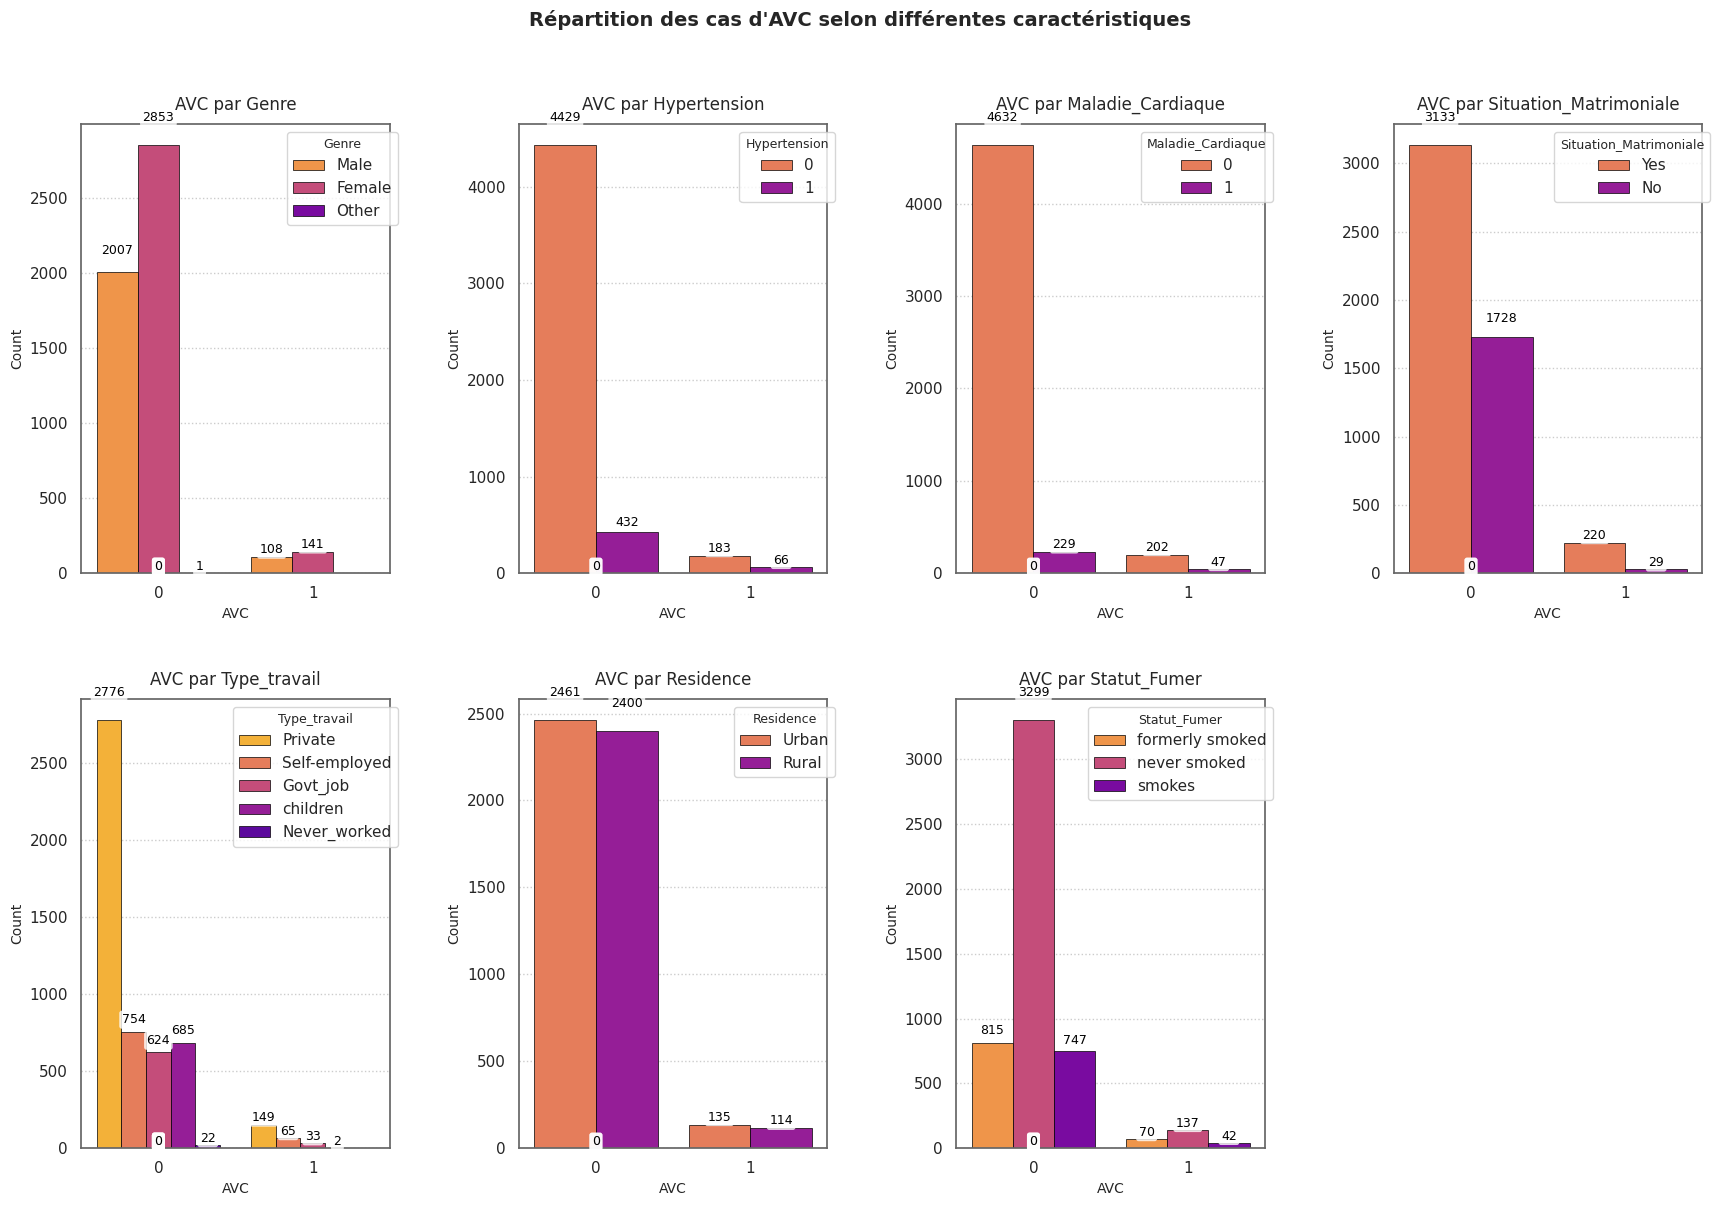

In [ ]:
cat_vars = ['Genre', 'Hypertension', 'Maladie_Cardiaque', 'Situation_Matrimoniale',
            'Type_travail', 'Residence', 'Statut_Fumer']

# Création de la figure avec une grille 2x4
plt.figure(figsize=(18, 12))

# Première ligne: 4 graphiques
for i, var in enumerate(cat_vars[:4], 1):
    plt.subplot(2, 4, i)
    ax = sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
                      edgecolor='black', linewidth=0.5, saturation=0.9)
    plt.title(f"AVC par {var}", fontsize=12, pad=10)
    plt.xlabel("AVC", fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), title_fontsize=9)

    # Annotations optimisées
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

# Deuxième ligne: 3 graphiques centrés
for i, var in enumerate(cat_vars[4:], 5):
    plt.subplot(2, 4, i)
    ax = sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
                      edgecolor='black', linewidth=0.5, saturation=0.9)
    plt.title(f"AVC par {var}", fontsize=12, pad=10)
    plt.xlabel("AVC", fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), title_fontsize=9)

    # Annotations optimisées
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

# Désactiver le 8ème subplot
plt.subplot(2, 4, 8)
plt.axis('off')

# Ajustement de l'espacement
plt.tight_layout(pad=3.0)
plt.suptitle("Répartition des cas d'AVC selon différentes caractéristiques", y=1.03, fontsize=14, weight='bold')
plt.show()

### Test d'independance de khi-deux

In [ ]:
for var in df_categorielles.columns[:-1]:
    table_contegence = pd.crosstab(df[var], df['AVC'])
    print(f"Tableau croisé pour {var}:\n", table_contegence)

    # Test du Chi-carré
    chi2, p, dof, expected = chi2_contingency(table_contegence)
    print(f"Test du Chi-carré pour {var}:")
    print(f"  Chi2 statistic: {chi2}")
    print(f"  p-value: {p}")
    if p < 0.05:
         print(f"il existe une relation significative entre {var} et le type AVC.\n\n\n")
    else:

        print(f"Aucune relation significative détecté entre {var} et le type AVC.\n\n")

Tableau croisé pour Genre:
 AVC        0    1
Genre            
Female  2853  141
Male    2007  108
Other      1    0
Test du Chi-carré pour Genre:
  Chi2 statistic: 0.47258662884530234
  p-value: 0.7895490538408245
Aucune relation significative détecté entre Genre et le type AVC.


Tableau croisé pour Hypertension:
 AVC              0    1
Hypertension           
0             4429  183
1              432   66
Test du Chi-carré pour Hypertension:
  Chi2 statistic: 81.6053682482931
  p-value: 1.661621901511823e-19
il existe une relation significative entre Hypertension et le type AVC.



Tableau croisé pour Maladie_Cardiaque:
 AVC                   0    1
Maladie_Cardiaque           
0                  4632  202
1                   229   47
Test du Chi-carré pour Maladie_Cardiaque:
  Chi2 statistic: 90.25956125843324
  p-value: 2.0887845685229236e-21
il existe une relation significative entre Maladie_Cardiaque et le type AVC.



Tableau croisé pour Situation_Matrimoniale:
 AVC         

#### Entre variable quantitative et qualitative

         count       mean        std    min   25%   50%   75%   max
Genre                                                              
Female  2994.0  43.757395  21.966561   0.08  27.0  44.0  61.0  82.0
Male    2115.0  42.483385  23.484066   0.08  22.0  46.0  61.0  82.0
Other      1.0  26.000000        NaN  26.00  26.0  26.0  26.0  26.0


/tmp/ipython-input-47-1761252738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Age', data=df, palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


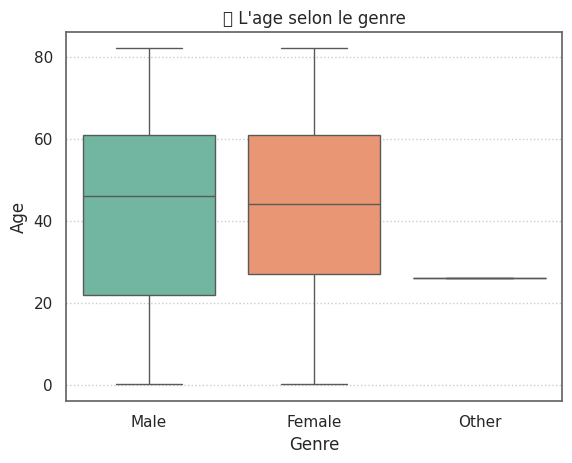

In [ ]:
print(df.groupby('Genre')['Age'].describe())
# Boxplot
sns.boxplot(x='Genre', y='Age', data=df, palette="Set2")
plt.title("🛑 L'age selon le genre")
plt.show()


####  Test t de Student

In [ ]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
# Séparation des groupes
hommes = df[df['Genre'] == 'Homme']['Age']
femmes = df[df['Genre'] == 'Femme']['Age']
t_stat, p_value = stats.ttest_ind(hommes, femmes, equal_var=False)
print(f"T-statistique = {t_stat:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("L'age diffère significativement selon le genre.")
else:
    print("Aucune différence significative de l'age selon le genre.")


T-statistique = nan, p-value = nan
Aucune différence significative de l'age selon le genre.


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


##### AVC et Taux_glucose_moyen

##### Les distribution des groupes ne suivent pas la loi normale utilison les test non paramétrique

#### AVC & Age

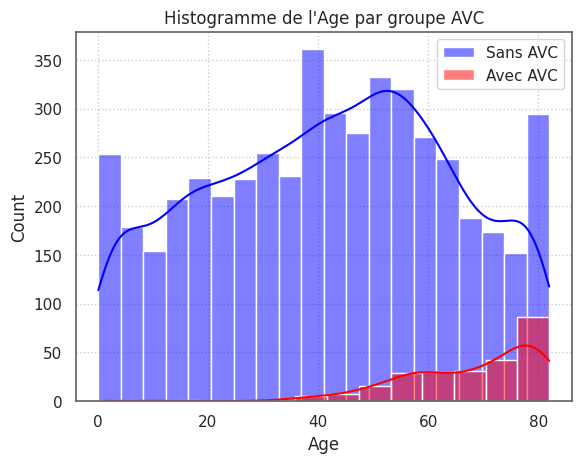

Sans AVC - Stat=0.970, p=0.000
Avec AVC - Stat=0.878, p=0.000


In [ ]:
sns.histplot(df[df['AVC'] == 0]['Age'], kde=True, color='blue', label='Sans AVC')
sns.histplot(df[df['AVC'] == 1]['Age'], kde=True, color='red', label='Avec AVC')
plt.legend()
plt.title("Histogramme de l'Age par groupe AVC")
plt.show()

# Groupe sans AVC
stat1, p1 = shapiro(df[df['AVC'] == 0]['Age'])
print(f"Sans AVC - Stat={stat1:.3f}, p={p1:.3f}")

# Groupe avec AVC
stat2, p2 = shapiro(df[df['AVC'] == 1]['Age'])
print(f"Avec AVC - Stat={stat2:.3f}, p={p2:.3f}")


      count       mean        std   min   25%   50%   75%   max
AVC                                                            
0    4861.0  41.971545  22.291940  0.08  24.0  43.0  59.0  82.0
1     249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0


/tmp/ipython-input-50-145994358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AVC')['Age'].describe())
/tmp/ipython-input-50-145994358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AVC', y='Age', data=df, palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


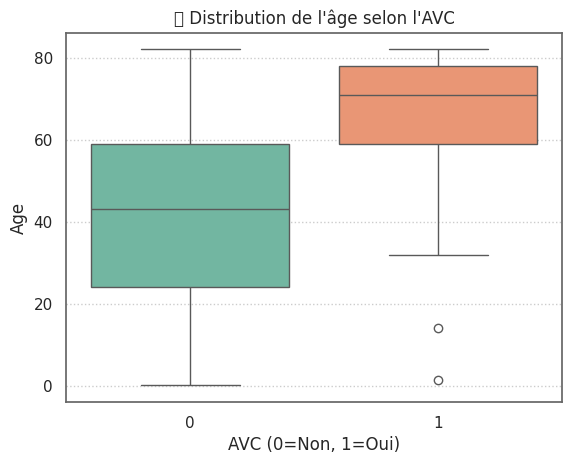

In [ ]:
print(df.groupby('AVC')['Age'].describe())
# Boxplot
sns.boxplot(x='AVC', y='Age', data=df, palette="Set2")
plt.title("🛑 Distribution de l'âge selon l'AVC")
plt.xlabel("AVC (0=Non, 1=Oui)")
plt.show()


#### Test de Man whitney

In [ ]:
# Séparation des groupes
age_sans_avc = df[df['AVC'] == 0]['Age']
age_avec_avc = df[df['AVC'] == 1]['Age']

t_stat, p_value = stats.mannwhitneyu(age_sans_avc, age_avec_avc)
print(f"U-statistique = {t_stat:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Différence significative de l'âge moyen entre les groupes AVC.")
else:
    print("Pas de différence significative de l'âge moyen entre les groupes AVC.")

U-statistique = 200263.500, p-value = 0.0000
Différence significative de l'âge moyen entre les groupes AVC.


#### AVC & Taux de glycemie

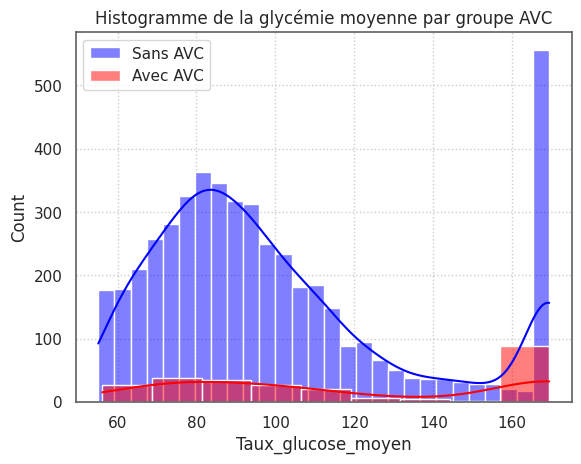

Sans AVC - Stat=0.878, p=0.000
Avec AVC - Stat=0.832, p=0.000


In [ ]:
sns.histplot(df[df['AVC'] == 0]['Taux_glucose_moyen'], kde=True, color='blue', label='Sans AVC')
sns.histplot(df[df['AVC'] == 1]['Taux_glucose_moyen'], kde=True, color='red', label='Avec AVC')
plt.legend()
plt.title("Histogramme de la glycémie moyenne par groupe AVC")
plt.show()

# Groupe sans AVC
stat1, p1 = shapiro(df[df['AVC'] == 0]['Taux_glucose_moyen'])
print(f"Sans AVC - Stat={stat1:.3f}, p={p1:.3f}")

# Groupe avec AVC
stat2, p2 = shapiro(df[df['AVC'] == 1]['Taux_glucose_moyen'])
print(f"Avec AVC - Stat={stat2:.3f}, p={p2:.3f}")


      count        mean        std    min    25%     50%       75%       max
AVC                                                                         
0    4861.0  100.126890  32.484047  55.12  77.12   91.47  112.8300  169.3575
1     249.0  117.967028  41.766465  56.11  79.79  105.22  169.3575  169.3575


/tmp/ipython-input-53-2483663623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AVC')['Taux_glucose_moyen'].describe())
/tmp/ipython-input-53-2483663623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AVC', y='Taux_glucose_moyen', data=df, palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


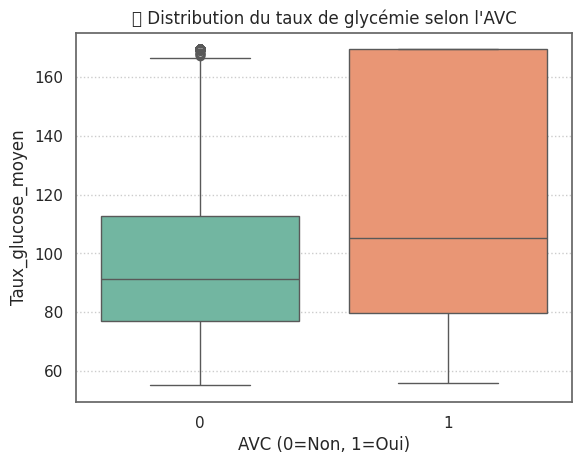

In [ ]:
# Moyenne et écart-type de la glycémie selon AVC
print(df.groupby('AVC')['Taux_glucose_moyen'].describe())
sns.boxplot(x='AVC', y='Taux_glucose_moyen', data=df, palette="Set2")
plt.title("🛑 Distribution du taux de glycémie selon l'AVC")
plt.xlabel("AVC (0=Non, 1=Oui)")
plt.show()

#### Test de Man Whitney

In [ ]:
## séparation des groupes
glicemie_sans_avc = df[df['AVC'] == 0]['Taux_glucose_moyen']
glicemie_avec_avc = df[df['AVC'] == 1]['Taux_glucose_moyen']

t_stat, p_value = stats.mannwhitneyu(glicemie_sans_avc, glicemie_avec_avc)
print(f"Statistique t : {t_stat:.2f}")
print(f"p-value : {p_value:.4f}")

if p_value < 0.05:
    print("La différence de glycémie moyenne entre les groupes est significative.")
else:
    print("Aucune différence significative de glycémie moyenne entre les groupes.")


Statistique t : 471779.50
p-value : 0.0000
La différence de glycémie moyenne entre les groupes est significative.


#### AVC & IMC

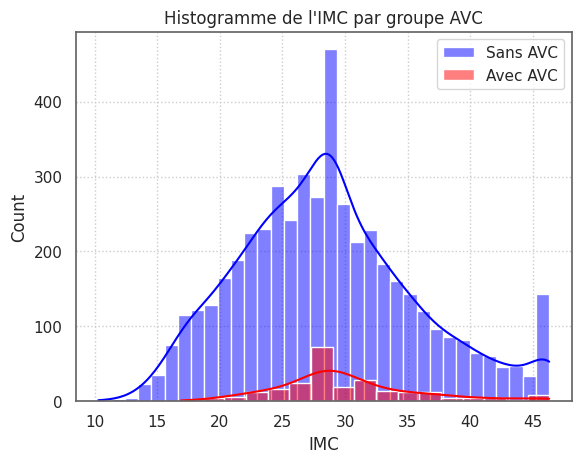

Sans AVC - Stat=0.980, p=0.000
Avec AVC - Stat=0.941, p=0.000


In [ ]:
sns.histplot(df[df['AVC'] == 0]['IMC'], kde=True, color='blue', label='Sans AVC')
sns.histplot(df[df['AVC'] == 1]['IMC'], kde=True, color='red', label='Avec AVC')
plt.legend()
plt.title("Histogramme de l'IMC par groupe AVC")
plt.show()

# Groupe sans AVC
stat1, p1 = shapiro(df[df['AVC'] == 0]['IMC'])
print(f"Sans AVC - Stat={stat1:.3f}, p={p1:.3f}")

# Groupe avec AVC
stat2, p2 = shapiro(df[df['AVC'] == 1]['IMC'])
print(f"Avec AVC - Stat={stat2:.3f}, p={p2:.3f}")


      count       mean       std   min   25%        50%   75%   max
AVC                                                                
0    4861.0  28.647873  7.180836  10.3  23.6  28.300000  32.8  46.3
1     249.0  30.161163  5.625364  16.9  27.0  28.893237  32.5  46.3


/tmp/ipython-input-56-3758547483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AVC')['IMC'].describe())
/tmp/ipython-input-56-3758547483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AVC', y='IMC', data=df, palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


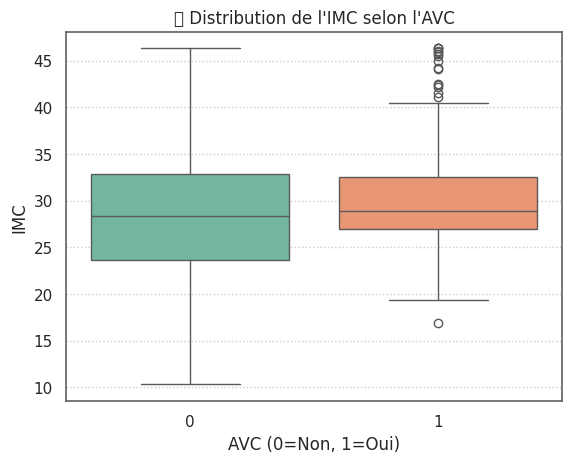

In [ ]:
print(df.groupby('AVC')['IMC'].describe())
sns.boxplot(x='AVC', y='IMC', data=df, palette="Set2")
plt.title("🛑 Distribution de l'IMC selon l'AVC")
plt.xlabel("AVC (0=Non, 1=Oui)")
plt.show()


#### Test de Man Whitney

In [ ]:
## séparation des groupes
imc_sans_avc = df[df['AVC'] == 0]['IMC']
imc_avec_avc = df[df['AVC'] == 1]['IMC']

t_stat, p_value = stats.mannwhitneyu(imc_sans_avc, imc_avec_avc)
print(f"Statistique t : {t_stat:.2f}")
print(f"p-value : {p_value:.4f}")

if p_value < 0.05:
    print("La différence de l'IMC entre les groupes est significative.")
else:
    print("Aucune différence significative de l'IMC entre les groupes.")


Statistique t : 515877.00
p-value : 0.0001
La différence de l'IMC entre les groupes est significative.


In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

def test_numeriques_vs_avc(df, var_cible='AVC'):
    # Sélection des variables numériques sauf la variable cible
    numeriques = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if var_cible in numeriques:
        numeriques.remove(var_cible)

    print(f"Variables numériques analysées vs {var_cible} : {numeriques}\n")

    for var in numeriques:
        print(f"--- Analyse de la variable : {var} ---")

        # 1. Visualisation boxplot en premier
        plt.figure(figsize=(6,4))
        sns.boxplot(x=var_cible, y=var, data=df, palette="Set2")
        plt.title(f"Distribution de {var} selon {var_cible}")
        plt.xlabel(f"{var_cible} (0 = Non, 1 = Oui)")
        plt.ylabel(var)
        plt.show()
        groupe0 = df[df[var_cible] == 0][var].dropna()
        groupe1 = df[df[var_cible] == 1][var].dropna()

        # Test de normalité
        p_norm_0 = shapiro(groupe0).pvalue
        p_norm_1 = shapiro(groupe1).pvalue

        # Test d'homogénéité des variances
        p_levene = levene(groupe0, groupe1).pvalue

        print(f"Normalité p-values : groupe 0 = {p_norm_0:.4f}, groupe 1 = {p_norm_1:.4f}")
        print(f"Homogénéité des variances (Levene) p-value : {p_levene:.4f}")

        # Choix du test
        if p_norm_0 > 0.05 and p_norm_1 > 0.05 and p_levene > 0.05:
            # Test t de Student
            stat, p_val = ttest_ind(groupe0, groupe1, equal_var=True)
            test_name = "Test t de Student"
        else:
            # Test de Mann-Whitney
            stat, p_val = mannwhitneyu(groupe0, groupe1)
            test_name = "Test de Mann-Whitney"

        print(f"{test_name} : stat = {stat:.4f}, p-value = {p_val:.4f}")
        if p_val < 0.05:
            print(f"--> Différence significative détectée pour la variable {var}\n")
        else:
            print(f"--> Pas de différence significative pour la variable {var}\n")

        #


/tmp/ipython-input-59-415984581.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-59-415984581.py:75: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(
/tmp/ipython-input-59-415984581.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-59-415984581.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-59-415984581.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is

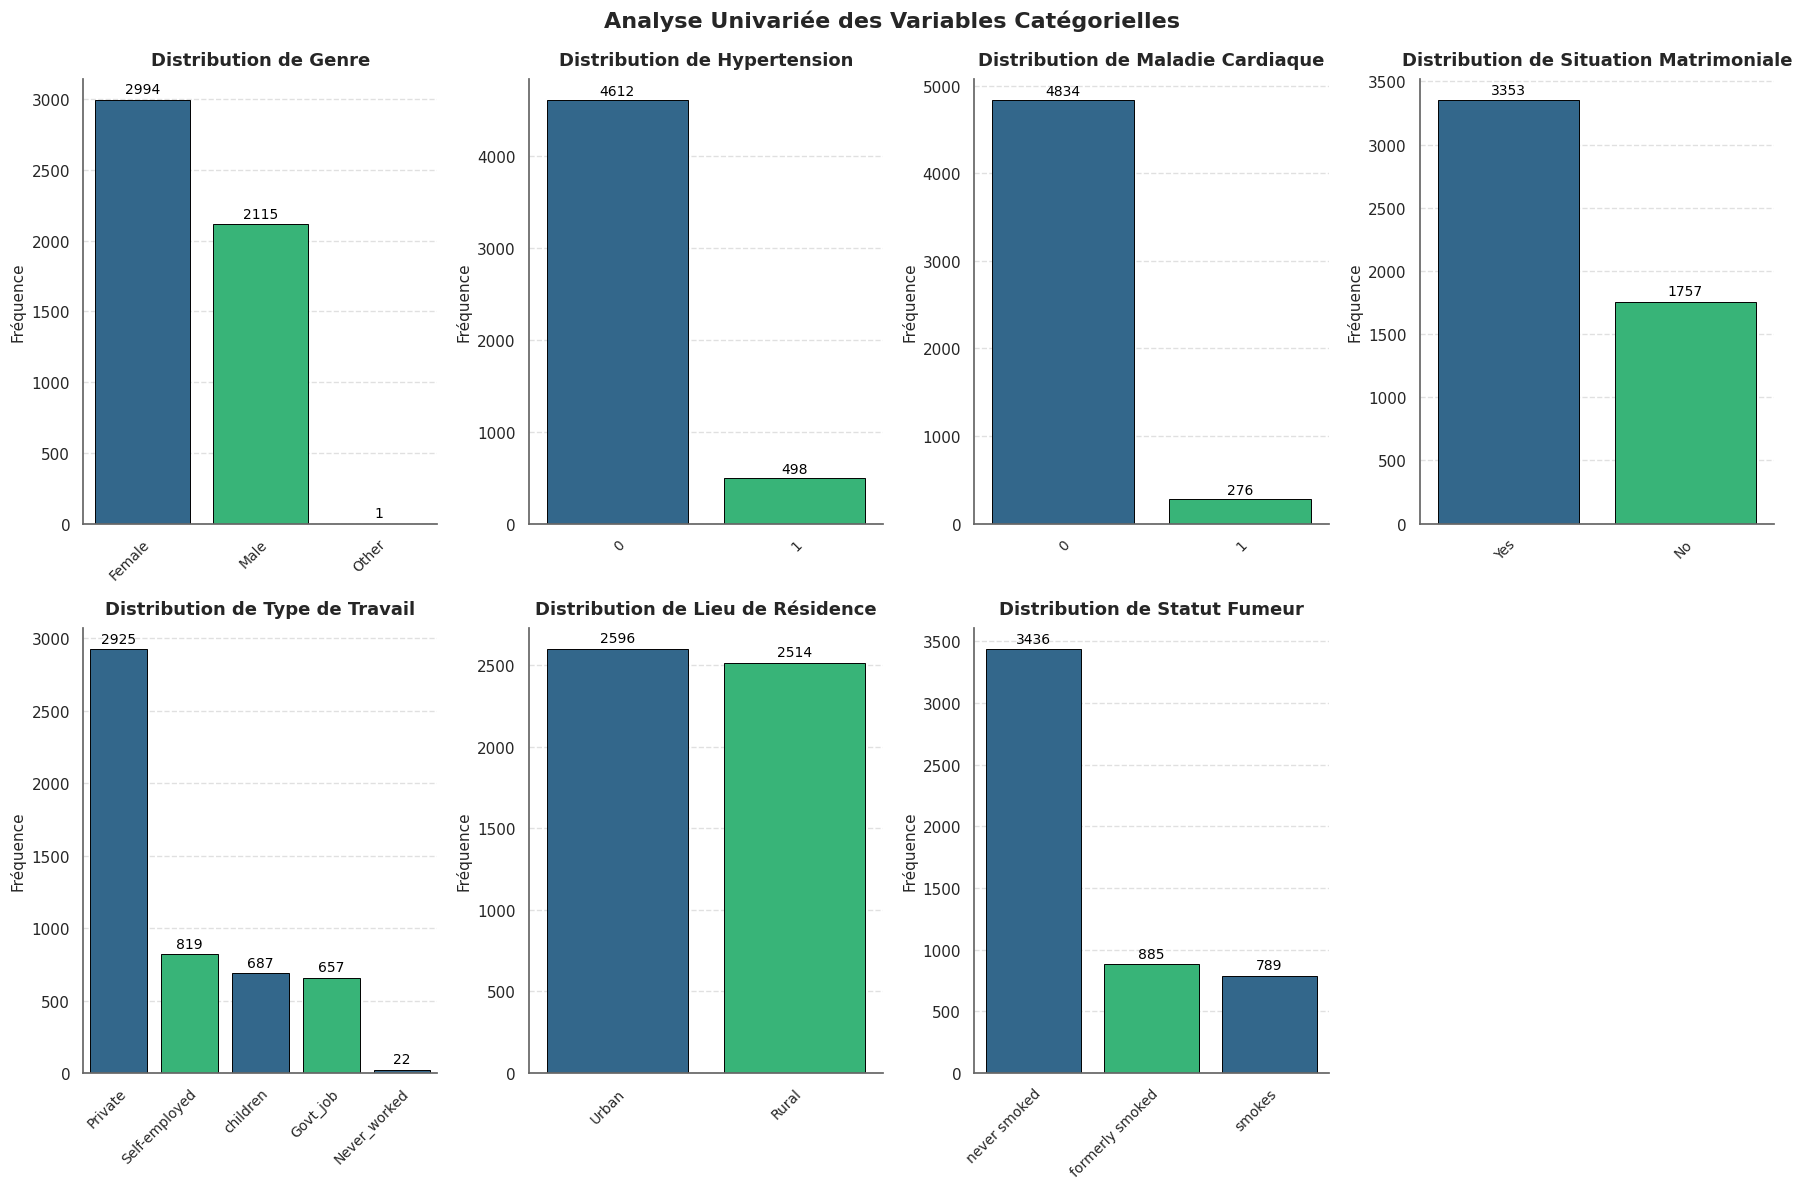

In [ ]:
# prompt: je veux afficher la distribution des variables categorielle (analyse univarié) mets ca  4 en haut 4 en bas  et inspire toi de ce code pour l'embellir : cat_vars = ['Genre', 'Hypertension', 'Maladie_Cardiaque', 'Situation_Matrimoniale',
#             'Type_travail', 'Residence', 'Statut_Fumer']
# # Création de la figure avec une grille 2x4
# plt.figure(figsize=(18, 12))
# # Première ligne: 4 graphiques
# for i, var in enumerate(cat_vars[:4], 1):
#     plt.subplot(2, 4, i)
#     ax = sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
#                       edgecolor='black', linewidth=0.5, saturation=0.9)
#     plt.title(f"AVC par {var}", fontsize=12, pad=10)
#     plt.xlabel("AVC", fontsize=10)
#     plt.ylabel("Count", fontsize=10)
#     plt.legend(title=var, bbox_to_anchor=(1.05, 1), title_fontsize=9)
#     # Annotations optimisées
#     for p in ax.patches:
#         height = p.get_height()
#         ax.text(
#             p.get_x() + p.get_width()/2,
#             height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
#             f'{int(height)}',
#             ha='center',
#             va='bottom',
#             fontsize=9,
#             color='black',
#             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
#         )
# # Deuxième ligne: 3 graphiques centrés
# for i, var in enumerate(cat_vars[4:], 5):
#     plt.subplot(2, 4, i)
#     ax = sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
#                       edgecolor='black', linewidth=0.5, saturation=0.9)
#     plt.title(f"AVC par {var}", fontsize=12, pad=10)
#     plt.xlabel("AVC", fontsize=10)
#     plt.ylabel("Count", fontsize=10)
#     plt.legend(title=var, bbox_to_anchor=(1.05, 1), title_fontsize=9)
#     # Annotations optimisées
#     for p in ax.patches:
#         height = p.get_height()
#         ax.text(
#             p.get_x() + p.get_width()/2,
#             height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
#             f'{int(height)}',
#             ha='center',

import matplotlib.pyplot as plt
cat_vars = ['Genre', 'Hypertension', 'Maladie_Cardiaque', 'Situation_Matrimoniale',
            'Type_travail', 'Residence', 'Statut_Fumer']

# Création de la figure avec une grille 2x4 pour un affichage optimisé
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Renommage des variables pour les titres si nécessaire
variable_names = {
    'Genre': 'Genre',
    'Hypertension': 'Hypertension',
    'Maladie_Cardiaque': 'Maladie Cardiaque',
    'Situation_Matrimoniale': 'Situation Matrimoniale',
    'Type_travail': 'Type de Travail',
    'Residence': 'Lieu de Résidence',
    'Statut_Fumer': 'Statut Fumeur'
}

# Palette de couleurs plus distincte et professionnelle
palette = sns.color_palette("viridis", n_colors=len(df['AVC'].unique()))

# Boucle pour chaque variable catégorielle
for i, var in enumerate(cat_vars):
    ax = axes[i]

    # Tri par fréquence (important pour l'ordre des barres)
    order = df[var].value_counts().index

    # Création du countplot
    sns.countplot(
        x=var,
        data=df,
        ax=ax,
        order=order,
        palette=palette,
        edgecolor='black',
        linewidth=0.7,
        saturation=0.95
    )

    # Annotations avec les counts
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + (df.shape[0] * 0.005),  # Petite marge au-dessus de la barre
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Paramètres esthétiques
    ax.set_title(f"Distribution de {variable_names.get(var, var)}", fontsize=13, pad=10, fontweight='semibold')
    ax.set_ylabel("Fréquence", fontsize=11)
    ax.set_xlabel("", fontsize=0)  # Suppression de l'étiquette sur l'axe x

    # Rotation des ticks de l'axe x pour une meilleure lisibilité
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)

    # Décoration des axes et de la grille
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.6)


# Masquer les subplots inutilisés (s'il y en a)
for j in range(len(cat_vars), len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement entre les subplots
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajout d'un rectangle pour laisser de la place au suptitle

# Titre global
plt.suptitle("Analyse Univariée des Variables Catégorielles", y=0.99, fontsize=16, fontweight='bold')

# Affichage du graphique
plt.show()


/tmp/ipython-input-60-2518316117.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-60-2518316117.py:78: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(
/tmp/ipython-input-60-2518316117.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-60-2518316117.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-60-2518316117.py:78: FutureWarning: 

Passing `palette` without assigning `hu

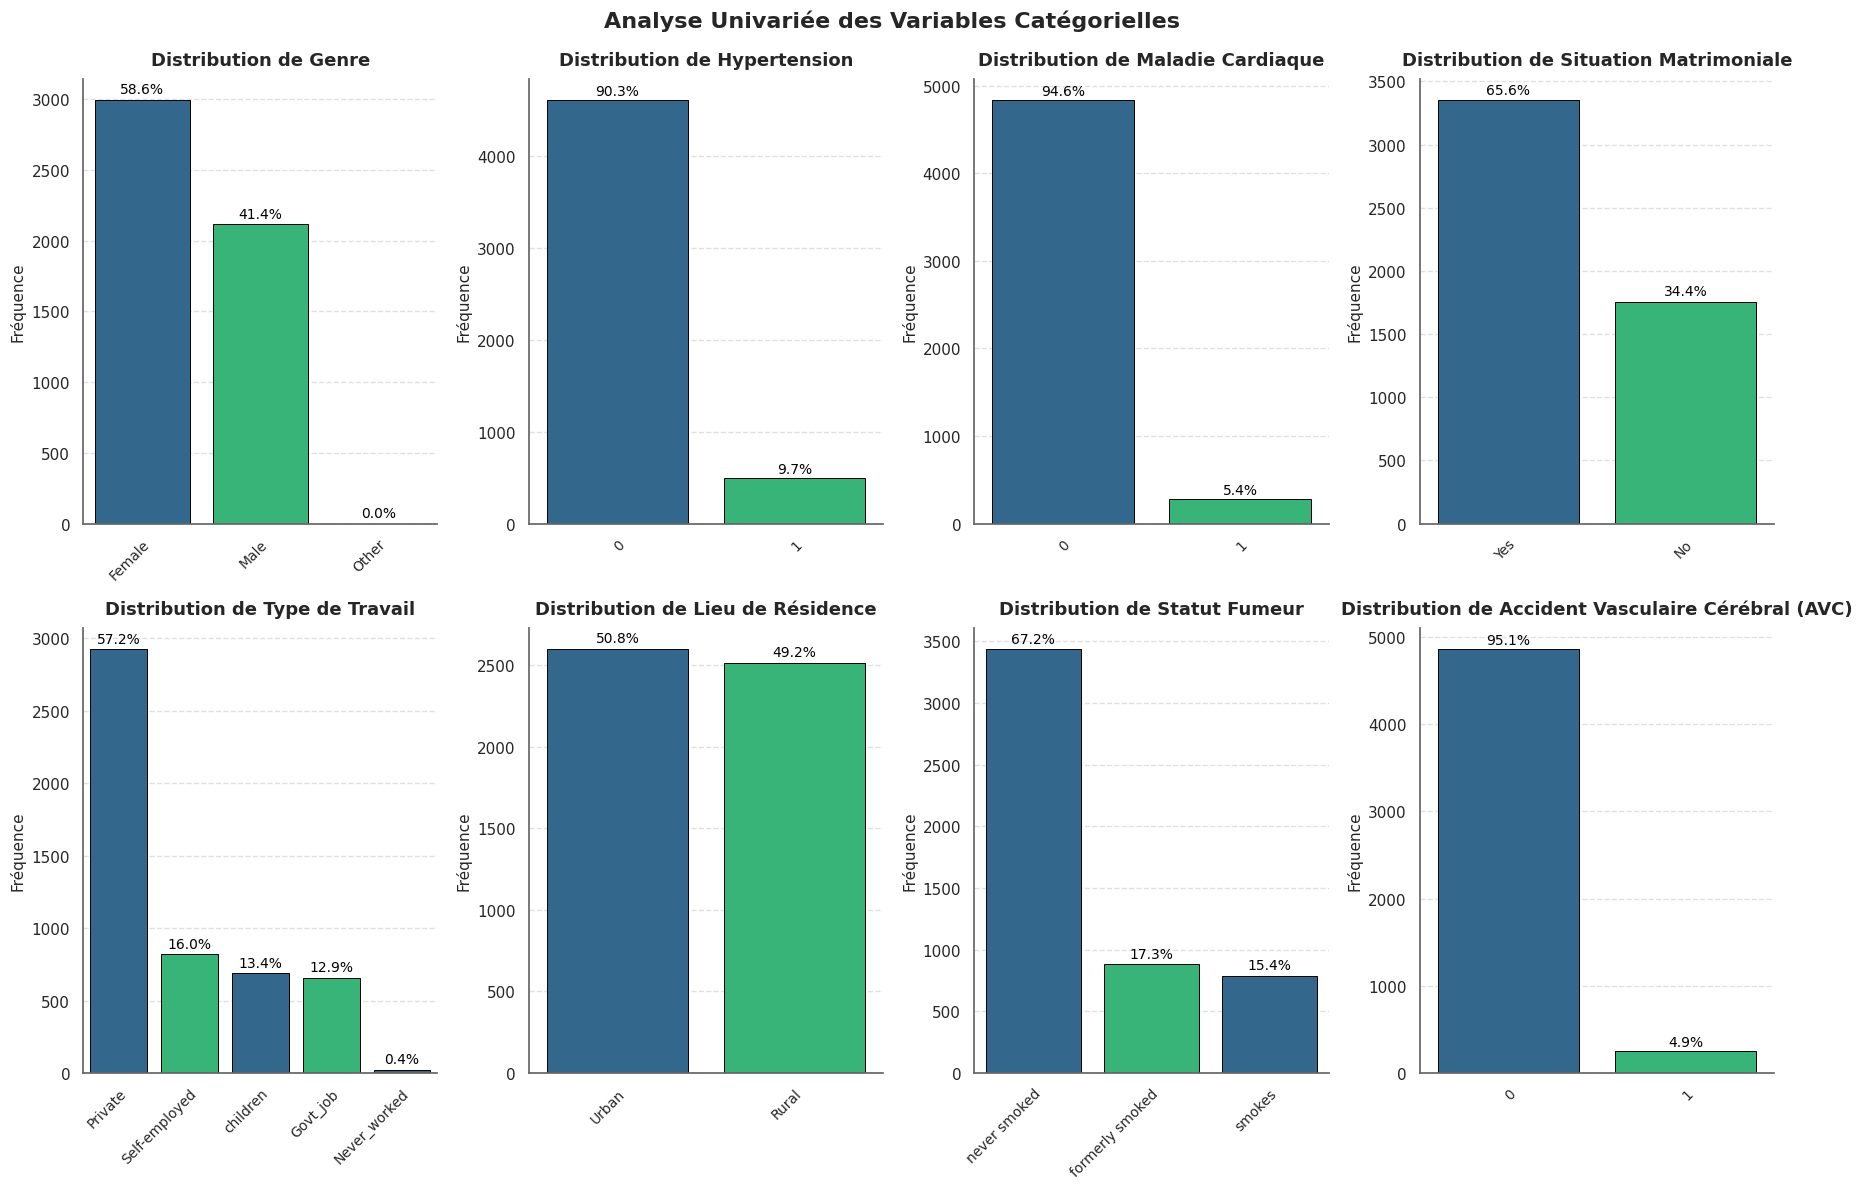

In [ ]:
# prompt: ajoute la variable AVC et marque les pourcentage au lieu des chiffre # prompt: je veux afficher la distribution des variables categorielle (analyse univarié) mets ca  4 en haut 4 en bas  et inspire toi de ce code pour l'embellir : cat_vars = ['Genre', 'Hypertension', 'Maladie_Cardiaque', 'Situation_Matrimoniale',
# #             'Type_travail', 'Residence', 'Statut_Fumer']
# # # Création de la figure avec une grille 2x4
# # plt.figure(figsize=(18, 12))
# # # Première ligne: 4 graphiques
# # for i, var in enumerate(cat_vars[:4], 1):
# #     plt.subplot(2, 4, i)
# #     ax = sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
# #                       edgecolor='black', linewidth=0.5, saturation=0.9)
# #     plt.title(f"AVC par {var}", fontsize=12, pad=10)
# #     plt.xlabel("AVC", fontsize=10)
# #     plt.ylabel("Count", fontsize=10)
# #     plt.legend(title=var, bbox_to_anchor=(1.05, 1), title_fontsize=9)
# #     # Annotations optimisées
# #     for p in ax.patches:
# #         height = p.get_height()
# #         ax.text(
# #             p.get_x() + p.get_width()/2,
# #             height + max(height*0.05, 0.5),  # Adaptation dynamique à la hauteur
# #             f'{int(height)}',
# #             ha='center',
# #             va='bottom',
# #             fontsize=9,
# #             color='black',
# #             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
# #         )
# # # Deuxième ligne: 3 graphiques centrés
# # for i, var in enumerate(cat_vars[4:], 5):
# #     plt.subplot(2, 4, i)
# #     ax = sns.countplot(data=df, x='AVC', hue=var, palette='plasma_r',
# #                       edgecolor='black', linewidth=0.5, saturation=0.9)
# #     plt.title(f"AVC par {var}", fontsize=12, pad=10)
# #     plt.xlabel("AVC", fontsize=10)
# #     plt.ylabel("Count", fontsize=10)
# #     plt.legend(title=var, bbox_to_anchor=(1.05, 1), title_fontsize=9)
# #     # Annotations optimisées
# #     for p in ax.patches:
# #         height = p.get_height()
# #         ax.text(
# #             p.get_x() + p.get_widt

import matplotlib.pyplot as plt
# Analyse Univariée - Distribution des Variables Catégorielles avec Pourcentages
cat_vars = ['Genre', 'Hypertension', 'Maladie_Cardiaque', 'Situation_Matrimoniale',
            'Type_travail', 'Residence', 'Statut_Fumer', 'AVC'] # Ajout de 'AVC'

# Création de la figure avec une grille 2x4 (8 graphiques potentiels)
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Renommage des variables pour les titres si nécessaire
variable_names = {
    'Genre': 'Genre',
    'Hypertension': 'Hypertension',
    'Maladie_Cardiaque': 'Maladie Cardiaque',
    'Situation_Matrimoniale': 'Situation Matrimoniale',
    'Type_travail': 'Type de Travail',
    'Residence': 'Lieu de Résidence',
    'Statut_Fumer': 'Statut Fumeur',
    'AVC': 'Accident Vasculaire Cérébral (AVC)' # Renommage d'AVC
}

# Palette de couleurs plus distincte et professionnelle
palette = sns.color_palette("viridis", n_colors=len(df['AVC'].unique()))

# Boucle pour chaque variable catégorielle
for i, var in enumerate(cat_vars):
    ax = axes[i]

    # Calcul des effectifs et pourcentages
    value_counts = df[var].value_counts()
    total = value_counts.sum()

    # Tri par fréquence (important pour l'ordre des barres)
    order = value_counts.index

    # Création du countplot
    sns.countplot(
        x=var,
        data=df,
        ax=ax,
        order=order,
        palette=palette,
        edgecolor='black',
        linewidth=0.7,
        saturation=0.95
    )

    # Annotations avec les pourcentages
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{height / total:.1%}' # Calcul et formatage du pourcentage
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + (df.shape[0] * 0.005),  # Petite marge au-dessus de la barre
            percentage,
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Paramètres esthétiques
    ax.set_title(f"Distribution de {variable_names.get(var, var)}", fontsize=13, pad=10, fontweight='semibold')
    ax.set_ylabel("Fréquence", fontsize=11)
    ax.set_xlabel("", fontsize=0)  # Suppression de l'étiquette sur l'axe x

    # Rotation des ticks de l'axe x pour une meilleure lisibilité
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)

    # Décoration des axes et de la grille
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.6)


# Masquer les subplots inutilisés (s'il y en a)
for j in range(len(cat_vars), len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement entre les subplots
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajout d'un rectangle pour laisser de la place au suptitle

# Titre global
plt.suptitle("Analyse Univariée des Variables Catégorielles", y=0.99, fontsize=16, fontweight='bold')

# Affichage du graphique
plt.show()


Variables numériques analysées vs AVC : ['Age', 'Taux_glucose_moyen', 'IMC']

--- Analyse de la variable : Age ---


/tmp/ipython-input-58-1001718392.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var_cible, y=var, data=df, palette="Set2")


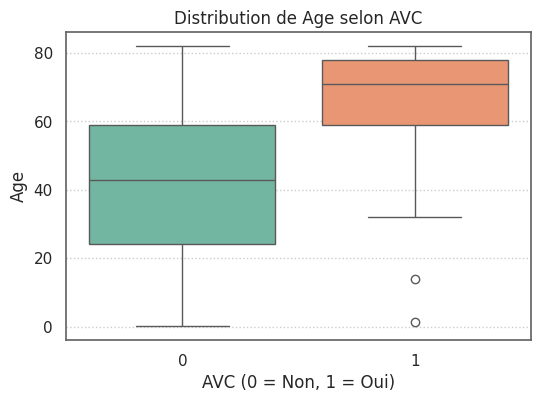

/tmp/ipython-input-58-1001718392.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var_cible, y=var, data=df, palette="Set2")


Normalité p-values : groupe 0 = 0.0000, groupe 1 = 0.0000
Homogénéité des variances (Levene) p-value : 0.0000
Test de Mann-Whitney : stat = 200263.5000, p-value = 0.0000
--> Différence significative détectée pour la variable Age

--- Analyse de la variable : Taux_glucose_moyen ---


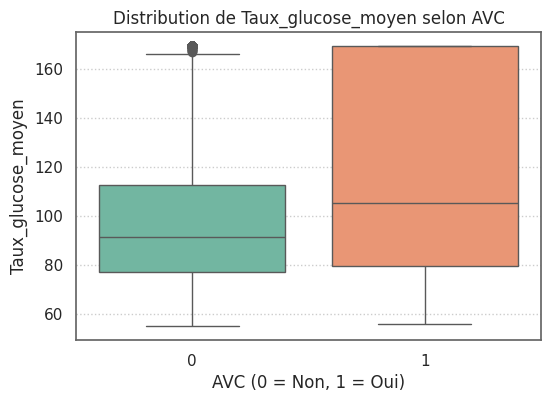

Normalité p-values : groupe 0 = 0.0000, groupe 1 = 0.0000
Homogénéité des variances (Levene) p-value : 0.0000
Test de Mann-Whitney : stat = 471779.5000, p-value = 0.0000
--> Différence significative détectée pour la variable Taux_glucose_moyen

--- Analyse de la variable : IMC ---


/tmp/ipython-input-58-1001718392.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var_cible, y=var, data=df, palette="Set2")


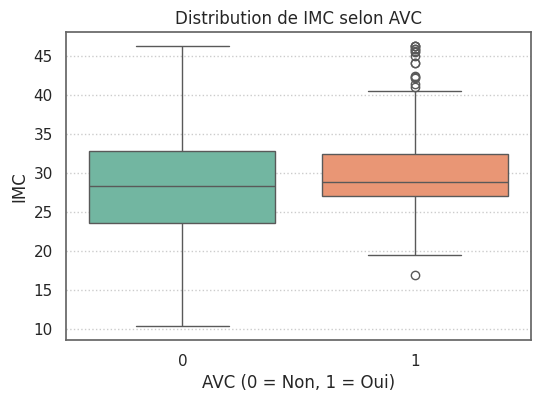

Normalité p-values : groupe 0 = 0.0000, groupe 1 = 0.0000
Homogénéité des variances (Levene) p-value : 0.0000
Test de Mann-Whitney : stat = 515877.0000, p-value = 0.0001
--> Différence significative détectée pour la variable IMC



In [ ]:
test_numeriques_vs_avc(df)


### Encodage

In [ ]:
df.head()

Genre   Age Hypertension Maladie_Cardiaque Situation_Matrimoniale  \
0    Male  67.0            0                 1                    Yes   
1  Female  61.0            0                 0                    Yes   
2    Male  80.0            0                 1                    Yes   
3  Female  49.0            0                 0                    Yes   
4  Female  79.0            1                 0                    Yes   

    Type_travail Residence  Taux_glucose_moyen        IMC     Statut_Fumer AVC  
0        Private     Urban            169.3575  36.600000  formerly smoked   1  
1  Self-employed     Rural            169.3575  28.893237     never smoked   1  
2        Private     Rural            105.9200  32.500000     never smoked   1  
3        Private     Urban            169.3575  34.400000           smokes   1  
4  Self-employed     Rural            169.3575  24.000000     never smoked   1

In [ ]:
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Genre'] = df['Genre'].astype('category')
df['Type_travail'] = label_encoder.fit_transform(df['Type_travail'])
df['Type_travail'] = df['Type_travail'].astype('category')
df['Situation_Matrimoniale'] = label_encoder.fit_transform(df['Situation_Matrimoniale'])
df['Situation_Matrimoniale'] = df['Situation_Matrimoniale'].astype('category')
df['Residence'] = label_encoder.fit_transform(df['Residence'])
df['Residence'] = df['Residence'].astype('category')
df['Statut_Fumer'] = label_encoder.fit_transform(df['Statut_Fumer'])
df['Statut_Fumer'] = df['Statut_Fumer'].astype('category')
df.head()

Genre   Age Hypertension Maladie_Cardiaque Situation_Matrimoniale  \
0     1  67.0            0                 1                      1   
1     0  61.0            0                 0                      1   
2     1  80.0            0                 1                      1   
3     0  49.0            0                 0                      1   
4     0  79.0            1                 0                      1   

  Type_travail Residence  Taux_glucose_moyen        IMC Statut_Fumer AVC  
0            2         1            169.3575  36.600000            0   1  
1            3         0            169.3575  28.893237            1   1  
2            2         0            105.9200  32.500000            1   1  
3            2         1            169.3575  34.400000            2   1  
4            3         0            169.3575  24.000000            1   1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genre                   5110 non-null   category
 1   Age                     5110 non-null   float64 
 2   Hypertension            5110 non-null   category
 3   Maladie_Cardiaque       5110 non-null   category
 4   Situation_Matrimoniale  5110 non-null   category
 5   Type_travail            5110 non-null   category
 6   Residence               5110 non-null   category
 7   Taux_glucose_moyen      5110 non-null   float64 
 8   IMC                     5110 non-null   float64 
 9   Statut_Fumer            5110 non-null   category
 10  AVC                     5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 160.9 KB


In [ ]:
df_categorielles = df.select_dtypes(include=['category'])
df_categorielles

Genre Hypertension Maladie_Cardiaque Situation_Matrimoniale Type_travail  \
0        1            0                 1                      1            2   
1        0            0                 0                      1            3   
2        1            0                 1                      1            2   
3        0            0                 0                      1            2   
4        0            1                 0                      1            3   
...    ...          ...               ...                    ...          ...   
5105     0            1                 0                      1            2   
5106     0            0                 0                      1            3   
5107     0            0                 0                      1            3   
5108     1            0                 0                      1            2   
5109     0            0                 0                      1            0   

     Residence Statut_Fumer AVC  
0            1            0   1  
1            0            1   1  
2            0            1   1  
3            1            2   1  
4            0            1   1  
...        ...          ...  ..  
5105         1            1   0  
5106         1            1   0  
5107         0            1   0  
5108         0            0   0  
5109         1            1   0  

[5110 rows x 8 columns]

### Matrice de corrélation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Genre'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Hypertension'),
  Text(3.5, 0, 'Maladie_Cardiaque'),
  Text(4.5, 0, 'Situation_Matrimoniale'),
  Text(5.5, 0, 'Type_travail'),
  Text(6.5, 0, 'Residence'),
  Text(7.5, 0, 'Taux_glucose_moyen'),
  Text(8.5, 0, 'IMC'),
  Text(9.5, 0, 'Statut_Fumer'),
  Text(10.5, 0, 'AVC')])

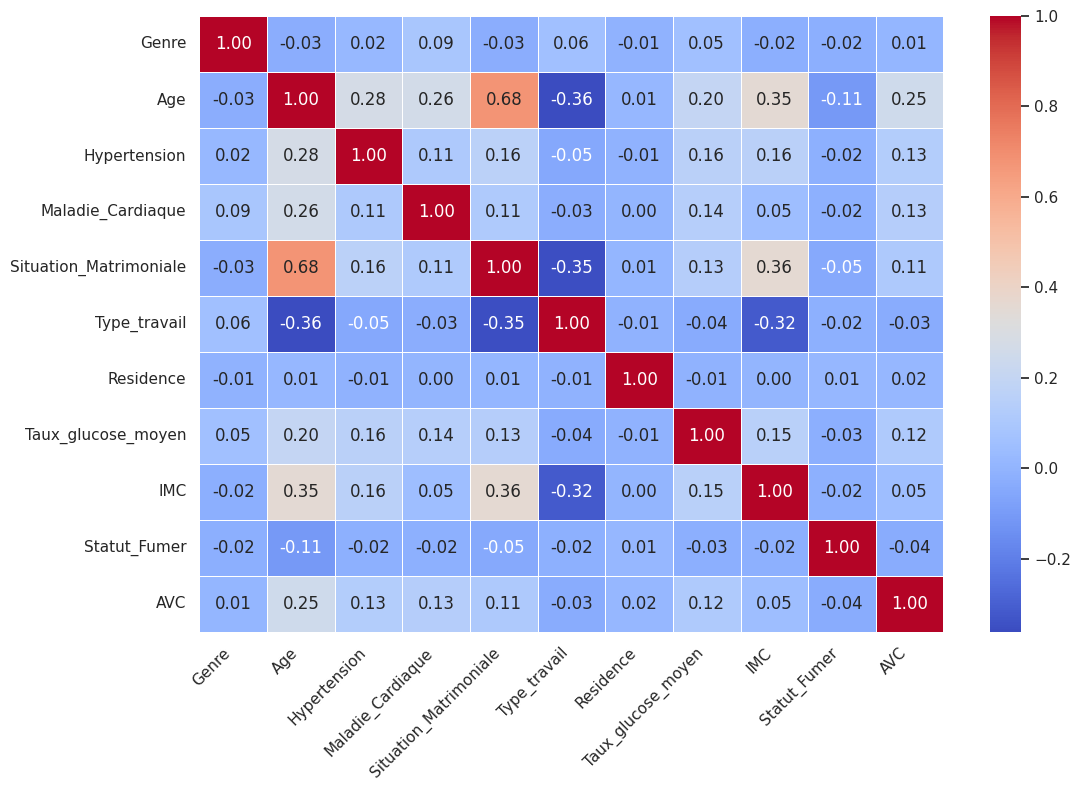

In [ ]:
# Tableau de corrélation
df_numeriques.corr()
# Matrice de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')

In [ ]:
correlation_values = abs(df.corr()['AVC'].drop('AVC')).sort_values(ascending=False)
correlation_values

Age                       0.245257
Maladie_Cardiaque         0.134914
Hypertension              0.127904
Taux_glucose_moyen        0.115652
Situation_Matrimoniale    0.108340
IMC                       0.045765
Statut_Fumer              0.037057
Type_travail              0.032316
Residence                 0.015458
Genre                     0.008929
Name: AVC, dtype: float64

## Normalisation des variables numériques

In [ ]:
scaler = StandardScaler()
df_numeriques_normalise = pd.DataFrame(scaler.fit_transform(df_numeriques), columns=df_numeriques.columns)
df_numeriques_normalise

Age  Taux_glucose_moyen       IMC
0     1.051434            2.058363  1.106633
1     0.786070            2.058363  0.024107
2     1.626390            0.148256  0.530729
3     0.255342            2.058363  0.797611
4     1.582163            2.058363 -0.663218
...        ...                 ...       ...
5105  1.626390           -0.519284  0.024107
5106  1.670617            0.728778  1.584211
5107 -0.363842           -0.542168  0.263846
5108  0.343796            1.966000 -0.438475
5109  0.034205           -0.473216 -0.354197

[5110 rows x 3 columns]

## Concaténation des deux bases (categorielle et numerique)

In [ ]:
df_final = pd.concat([df_numeriques_normalise,df_categorielles], axis=1)
df_final

Age  Taux_glucose_moyen       IMC Genre Hypertension  \
0     1.051434            2.058363  1.106633     1            0   
1     0.786070            2.058363  0.024107     0            0   
2     1.626390            0.148256  0.530729     1            0   
3     0.255342            2.058363  0.797611     0            0   
4     1.582163            2.058363 -0.663218     0            1   
...        ...                 ...       ...   ...          ...   
5105  1.626390           -0.519284  0.024107     0            1   
5106  1.670617            0.728778  1.584211     0            0   
5107 -0.363842           -0.542168  0.263846     0            0   
5108  0.343796            1.966000 -0.438475     1            0   
5109  0.034205           -0.473216 -0.354197     0            0   

     Maladie_Cardiaque Situation_Matrimoniale Type_travail Residence  \
0                    1                      1            2         1   
1                    0                      1            3         0   
2                    1                      1            2         0   
3                    0                      1            2         1   
4                    0                      1            3         0   
...                ...                    ...          ...       ...   
5105                 0                      1            2         1   
5106                 0                      1            3         1   
5107                 0                      1            3         0   
5108                 0                      1            2         0   
5109                 0                      1            0         1   

     Statut_Fumer AVC  
0               0   1  
1               1   1  
2               1   1  
3               2   1  
4               1   1  
...           ...  ..  
5105            1   0  
5106            1   0  
5107            1   0  
5108            0   0  
5109            1   0  

[5110 rows x 11 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     5110 non-null   float64 
 1   Taux_glucose_moyen      5110 non-null   float64 
 2   IMC                     5110 non-null   float64 
 3   Genre                   5110 non-null   category
 4   Hypertension            5110 non-null   category
 5   Maladie_Cardiaque       5110 non-null   category
 6   Situation_Matrimoniale  5110 non-null   category
 7   Type_travail            5110 non-null   category
 8   Residence               5110 non-null   category
 9   Statut_Fumer            5110 non-null   category
 10  AVC                     5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 160.9 KB


In [ ]:
df['Hypertension'] = df['Hypertension'].astype('int')
df['Maladie_Cardiaque'] = df['Maladie_Cardiaque'].astype('int')
df['Genre'] = df['Genre'].astype('int')
df['Type_travail'] = df['Type_travail'].astype('int')
df['Situation_Matrimoniale'] = df['Situation_Matrimoniale'].astype('int')
df['Residence'] = df['Residence'].astype('int')
df['Statut_Fumer'] = df['Statut_Fumer'].astype('int')
df['AVC'] = df['AVC'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   5110 non-null   int64  
 1   Age                     5110 non-null   float64
 2   Hypertension            5110 non-null   int64  
 3   Maladie_Cardiaque       5110 non-null   int64  
 4   Situation_Matrimoniale  5110 non-null   int64  
 5   Type_travail            5110 non-null   int64  
 6   Residence               5110 non-null   int64  
 7   Taux_glucose_moyen      5110 non-null   float64
 8   IMC                     5110 non-null   float64
 9   Statut_Fumer            5110 non-null   int64  
 10  AVC                     5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


## Modélisation

#### Séparation des données

In [ ]:
X = df_final.drop(['AVC','Residence'], axis = 1)
Y = df_final['AVC']

In [ ]:
X['Genre'] = X['Genre'].astype('int')
X['Maladie_Cardiaque'] = X['Maladie_Cardiaque'].astype('int')
X['Hypertension'] = X['Hypertension'].astype('int')
X['Type_travail'] = X['Type_travail'].astype('int')
X['Situation_Matrimoniale'] = X['Situation_Matrimoniale'].astype('int')
#X['Residence'] = X['Residence'].astype('int')
X['Statut_Fumer'] = X['Statut_Fumer'].astype('int')
print(X.dtypes)

Age                       float64
Taux_glucose_moyen        float64
IMC                       float64
Genre                       int64
Hypertension                int64
Maladie_Cardiaque           int64
Situation_Matrimoniale      int64
Type_travail                int64
Statut_Fumer                int64
dtype: object


Oversampling avec SMOTE¶

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)
X_equi, Y_equi = smote.fit_resample(X, Y)
print("dimension de X: ", X_equi.shape)
print("dimension de Y: ", Y_equi.shape)

dimension de X:  (9722, 9)
dimension de Y:  (9722,)


([<matplotlib.axis.XTick at 0x7de98eb2ced0>,
 [Text(0, 0, 'oui'), Text(1, 0, 'Non')])

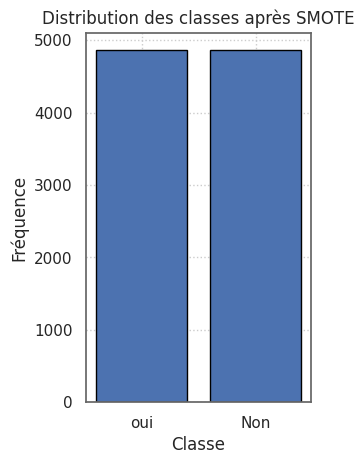

In [ ]:
plt.subplot(1, 2, 2)
plt.bar([0, 1], [np.sum(Y_equi == 0), np.sum(Y_equi == 1)], edgecolor='black')
plt.title("Distribution des classes après SMOTE")
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.xticks([0, 1], ['oui', 'Non'])

In [ ]:
# Division de la base de données en train et test
X_train,X_test,Y_train,Y_test = train_test_split(X_equi, Y_equi, test_size=0.3, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6805, 9)
(2917, 9)
(6805,)
(2917,)


## Apprentissage et application du modèle

### Regression logistique

In [ ]:
modele_RL = LogisticRegression(max_iter=1000)

#### Entrainement du modèle

In [ ]:
modele_RL.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

#### Prédiction

In [ ]:
# Prédiction sur la base test
best_Y_test_pred_RL = modele_RL.predict(X_test)
best_Y_test_pred_RL

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# Prédiction sur la base train
best_Y_train_pred_RL = modele_RL.predict(X_train)
best_Y_train_pred_RL

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# prediction en proba sur la base train
Y_pred_train_proba_RL = modele_RL.predict_proba(X_train)
Y_pred_train_proba_RL

array([[0.20608268, 0.79391732],
       [0.63717569, 0.36282431],
       [0.20006969, 0.79993031],
       ...,
       [0.1952449 , 0.8047551 ],
       [0.93209852, 0.06790148],
       [0.42528603, 0.57471397]])

## Mesure de performance

#### Accuracy

In [ ]:
# Sur la base test
Acc_test_RL = accuracy_score(Y_test, best_Y_test_pred_RL) * 100
Acc_train_RL = accuracy_score(Y_train, best_Y_train_pred_RL) * 100
# Sur la base train
print("Accuracy sur train:", Acc_train_RL, "%")
print("Accuracy sur test:", Acc_test_RL, "%")


Accuracy sur train: 78.14842027920646 %
Accuracy sur test: 78.02536852931094 %


#### F1 score

In [ ]:
# Sur la base test et train
F1_score_test_RL = f1_score(Y_test, best_Y_test_pred_RL, average='weighted') * 100
F1_score_train_RL = f1_score(Y_train, best_Y_train_pred_RL, average='weighted') * 100
# Sur la base train
print("F1_score sur train:", F1_score_train_RL, "%")
print("F1_score sur test:", F1_score_test_RL, "%")


F1_score sur train: 78.1158804890842 %
F1_score sur test: 77.99992059321391 %


#### Précision

In [ ]:
# Sur la base test et train
precision_score_test_RL = precision_score(Y_test, best_Y_test_pred_RL, average='weighted') * 100
precision_score_train_RL = precision_score(Y_train, best_Y_train_pred_RL, average='weighted') * 100
# Sur la base train
print("Précision sur train:", precision_score_train_RL, "%")
print("Précision sur test:", precision_score_test_RL, "%")


Précision sur train: 78.30383775754254 %
Précision sur test: 78.18523891560424 %


#### Recall

In [ ]:
# Sur la base test et train
recall_score_test_RL = recall_score(Y_test, best_Y_test_pred_RL, average='weighted') * 100
recall_score_train_RL = recall_score(Y_train, best_Y_train_pred_RL, average='weighted') * 100
# Sur la base train
print("Recall sur train:", recall_score_train_RL, "%")
print("Recall sur test:", recall_score_test_RL, "%")


Recall sur train: 78.14842027920646 %
Recall sur test: 78.02536852931094 %


#### Matrice de confusion

In [ ]:
matrice_RL = confusion_matrix(Y_test, best_Y_test_pred_RL)

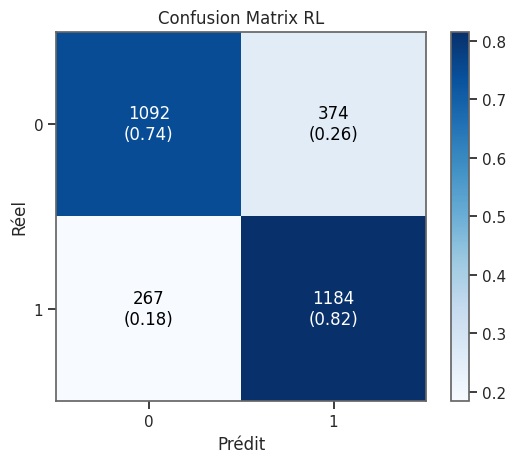

Alors dans la classe 0,sur 1466 individu,le modèle réussit à faire un bon classement sur 1092  individu et une erreur sur 374 
  Dans la classe 1,sur 1451 individus le modèle fait un bon classement sur 1184  individu et une erreur sur 1092


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
# Affichage de la matrice de confusion avec titre
fig, ax = plot_confusion_matrix(conf_mat=matrice_RL,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Confusion Matrix RL")
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

print("Alors dans la classe 0,sur",Y_test.value_counts()[0],
      "individu,le modèle réussit à faire un bon classement sur", matrice_RL[0,0],
      " individu et une erreur sur", matrice_RL[0,1], "\n  Dans la classe 1,sur",Y_test.value_counts()[1],
      "individus le modèle fait un bon classement sur", matrice_RL[1,1],
      " individu et une erreur sur", matrice_RL[0,0] )

***# taux de bon et mauvais classement***

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_RL[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_RL[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_RL[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_RL[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 74.49 %
Taux de mauvais classement (Classe 0 - Sans AVC): 25.51 %
Taux de bon classement (Classe 1 - Avec AVC): 81.60 %
Taux de mauvais classement (Classe 1 - Avec AVC): 18.40 %


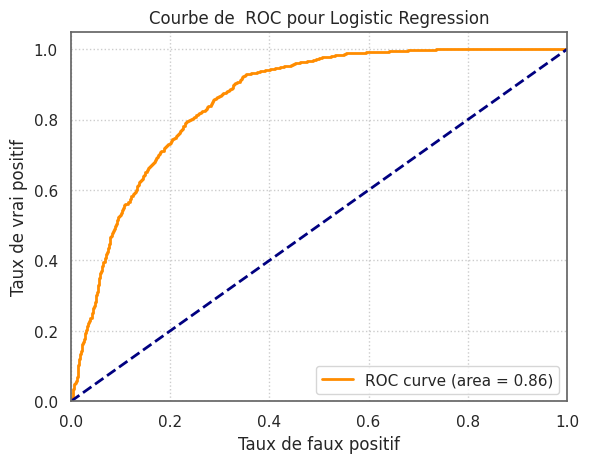

In [ ]:

# Courbe ROC
fpr_RL, tpr_RL, thresholds_RL = roc_curve(Y_test, modele_RL.predict_proba(X_test)[:, 1])
roc_auc_RL = auc(fpr_RL, tpr_RL)

plt.figure()
plt.plot(fpr_RL, tpr_RL, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RL)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe de  ROC pour Logistic Regression')
plt.legend(loc="lower right")
plt.show()


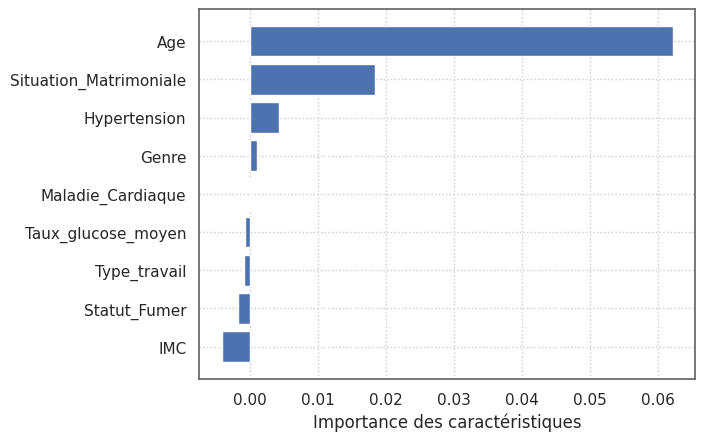

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(modele_RL, X, Y, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importance des caractéristiques")
plt.show()

## Arbre de décision

#### Optimisation des parametres avec GridSearchCV

In [ ]:
# Définir le modèle et les paramètres
modele_AD = DecisionTreeClassifier()
param_grid = [{
    'max_features':[1,2,3,4,5,6,7],
             'max_depth':[1,2,3,4,5,6,7,8,9,10]
             }
]
# Créer l'objet GridSearchCV
modele_opt_AD = GridSearchCV(modele_AD, # modèle initialisé
                         param_grid, # grilles de parametre du modèle
                         cv=5, # cross--validation
                         verbose=15 #longueur
                         )
# Entrainement du modèle
modele_opt_AD.fit(X_train,Y_train)
# parametre optimaux
best_param = modele_opt_AD.best_params_
print("VOILA LES MEILLEURS PARAMÉTRES :",best_param)
# meilleur modèle
best_modele_AD = modele_opt_AD.best_estimator_
best_modele_AD

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5; 1/70] START max_depth=1, max_features=1................................
[CV 1/5; 1/70] END .max_depth=1, max_features=1;, score=0.608 total time=   0.0s
[CV 2/5; 1/70] START max_depth=1, max_features=1................................
[CV 2/5; 1/70] END .max_depth=1, max_features=1;, score=0.607 total time=   0.0s
[CV 3/5; 1/70] START max_depth=1, max_features=1................................
[CV 3/5; 1/70] END .max_depth=1, max_features=1;, score=0.531 total time=   0.0s
[CV 4/5; 1/70] START max_depth=1, max_features=1................................
[CV 4/5; 1/70] END .max_depth=1, max_features=1;, score=0.623 total time=   0.0s
[CV 5/5; 1/70] START max_depth=1, max_features=1................................
[CV 5/5; 1/70] END .max_depth=1, max_features=1;, score=0.597 total time=   0.0s
[CV 1/5; 2/70] START max_depth=1, max_features=2................................
[CV 1/5; 2/70] END .max_depth=1, max_features=2

DecisionTreeClassifier(max_depth=10, max_features=7)

#### Prédiction

In [ ]:
# Prédiction sur la base test
best_Y_test_pred_AD = best_modele_AD.predict(X_test)
best_Y_test_pred_AD

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
# Prédiction sur la base train
best_Y_train_pred_AD = best_modele_AD.predict(X_train)
best_Y_train_pred_AD

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# prediction en proba sur la base train
Y_pred_train_proba_AD = best_modele_AD.predict_proba(X_train)
Y_pred_train_proba_AD

array([[0.12418301, 0.87581699],
       [0.57017544, 0.42982456],
       [0.12418301, 0.87581699],
       ...,
       [0.12418301, 0.87581699],
       [1.        , 0.        ],
       [0.        , 1.        ]])

## Mesures de performance

#### Accuracy

In [ ]:
# Sur la base test
Acc_test_AD = accuracy_score(Y_test, best_Y_test_pred_AD) * 100
Acc_train_AD = accuracy_score(Y_train, best_Y_train_pred_AD) * 100
# Sur la base train
print("Accuracy sur train:", Acc_train_AD, "%")
print("Accuracy sur test:", Acc_test_AD, "%")


Accuracy sur train: 89.37545922116091 %
Accuracy sur test: 84.16181007884813 %


#### F1 score

In [ ]:
# Sur la base test et train
F1_score_test_AD = f1_score(Y_test, best_Y_test_pred_AD, average='weighted') * 100
F1_score_train_AD = f1_score(Y_train, best_Y_train_pred_AD, average='weighted') * 100
# Sur la base train
print("F1_score sur train:", F1_score_train_AD, "%")
print("F1_score sur test:", F1_score_test_AD, "%")


F1_score sur train: 89.36368783227266 %
F1_score sur test: 84.14383781380785 %


#### Précision

In [ ]:
# Sur la base test et train
precision_score_test_AD = precision_score(Y_test, best_Y_test_pred_AD, average='weighted') * 100
precision_score_train_AD = precision_score(Y_train, best_Y_train_pred_AD, average='weighted') * 100
# Sur la base train
print("Précision sur train:", precision_score_train_AD, "%")
print("Précision sur test:", precision_score_test_AD, "%")


Précision sur train: 89.53779512632356 %
Précision sur test: 84.34902600079137 %


#### Recall

In [ ]:
# Sur la base test et train
recall_score_test_AD = recall_score(Y_test, best_Y_test_pred_AD, average='weighted') * 100
recall_score_train_AD = recall_score(Y_train, best_Y_train_pred_AD, average='weighted') * 100
# Sur la base train
print("Recall sur train:", recall_score_train_AD, "%")
print("Recall sur test:", recall_score_test_AD, "%")


Recall sur train: 89.37545922116091 %
Recall sur test: 84.16181007884813 %


#### Matrice de confusion

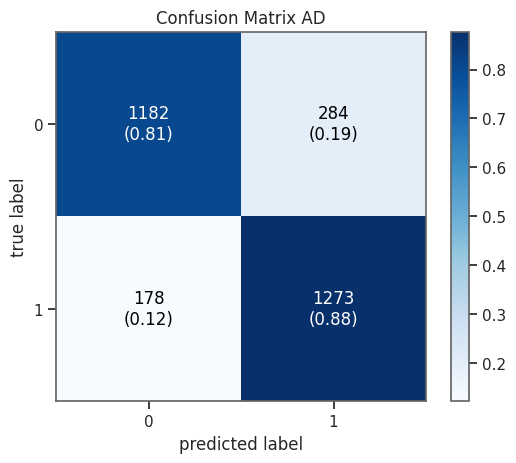

Alors dans la classe 0,sur 1466 individu,le modèle réussit à faire un bon classement sur 1182  individu et une erreur sur 284 
  Dans la classe 1,sur 1451 individus le modèle fait un bon classement sur 1273  individu et une erreur sur 1182


In [ ]:
matrice_AD = confusion_matrix(Y_test, best_Y_test_pred_AD)
# Affichage de la matrice de confusion avec titre
fig, ax = plot_confusion_matrix(conf_mat=matrice_AD,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Confusion Matrix AD")
plt.show()
print("Alors dans la classe 0,sur",Y_test.value_counts()[0],
      "individu,le modèle réussit à faire un bon classement sur", matrice_AD[0,0],
      " individu et une erreur sur", matrice_AD[0,1], "\n  Dans la classe 1,sur",Y_test.value_counts()[1],
      "individus le modèle fait un bon classement sur", matrice_AD[1,1],
      " individu et une erreur sur", matrice_AD[0,0] )

***taux de bon et mauvais classement***

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_AD[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_AD[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_AD[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_AD[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 80.63 %
Taux de mauvais classement (Classe 0 - Sans AVC): 19.37 %
Taux de bon classement (Classe 1 - Avec AVC): 87.73 %
Taux de mauvais classement (Classe 1 - Avec AVC): 12.27 %


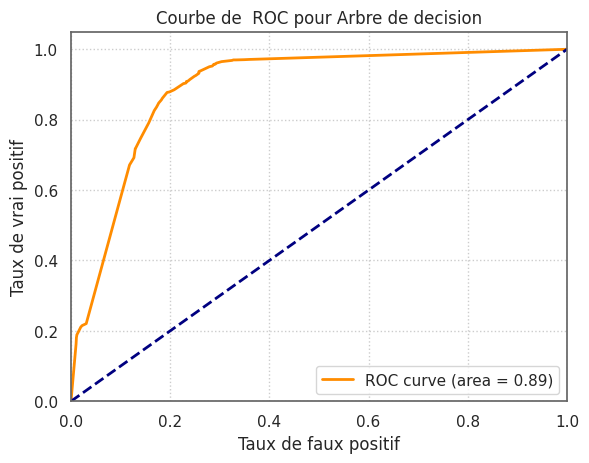

In [ ]:
# Courbe ROC
fpr_AD, tpr_AD, thresholds_AD = roc_curve(Y_test, best_modele_AD.predict_proba(X_test)[:, 1])
roc_auc_AD = auc(fpr_AD, tpr_AD)

plt.figure()
plt.plot(fpr_AD, tpr_AD, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_AD)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe de  ROC pour Arbre de decision')
plt.legend(loc="lower right")
plt.show()

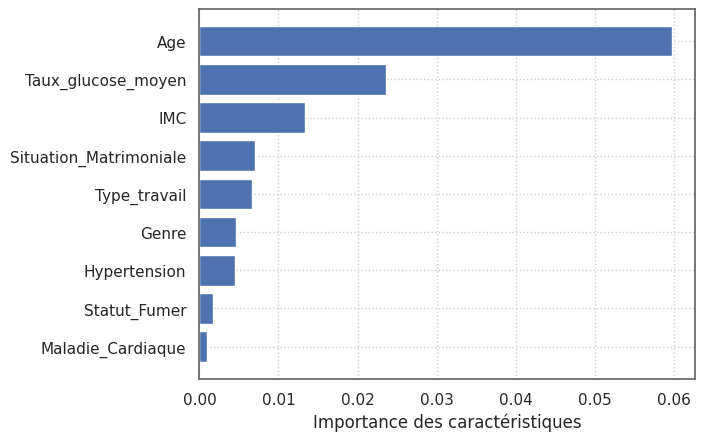

In [ ]:

result = permutation_importance(best_modele_AD, X, Y, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importance des caractéristiques")
plt.show()

## Random Forest

In [ ]:
modele = RandomForestClassifier()

# Définir le modèle et les paramètres
modele_RF = RandomForestClassifier()
param_grid = [{
    'n_estimators':[1,2,3,4,5,6,7,8,9,10],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4]
             }
]
# Créer l'objet GridSearchCV
modele_opt_RF = GridSearchCV(modele_RF, # modèle initialisé
                         param_grid, # grilles de parametre du modèle
                         cv=5, # cross--validation
                         verbose=15 #longueur
                            )
##Entrainement du modèle
modele_opt_RF.fit(X_train,Y_train)
# parametre optimaux
best_param = modele_opt_RF.best_params_
print("VOILA LES MEILLEURS PARAMÉTRES :",best_param)
# meilleur modèle
best_modele_RF = modele_opt_RF.best_estimator_
best_modele_RF

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START max_depth=1, min_samples_leaf=1, n_estimators=1...........
[CV 1/5; 1/400] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.796 total time=   0.0s
[CV 2/5; 1/400] START max_depth=1, min_samples_leaf=1, n_estimators=1...........
[CV 2/5; 1/400] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.788 total time=   0.0s
[CV 3/5; 1/400] START max_depth=1, min_samples_leaf=1, n_estimators=1...........
[CV 3/5; 1/400] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.616 total time=   0.0s
[CV 4/5; 1/400] START max_depth=1, min_samples_leaf=1, n_estimators=1...........
[CV 4/5; 1/400] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.631 total time=   0.0s
[CV 5/5; 1/400] START max_depth=1, min_samples_leaf=1, n_estimators=1...........
[CV 5/5; 1/400] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.769 total time=   0.0s
[CV 1/5; 2/400] START max_

RandomForestClassifier(max_depth=10, n_estimators=8)

#### Prédiction

In [ ]:
 # Prédiction sur la base test
best_Y_test_pred_RF = best_modele_RF.predict(X_test)
best_Y_test_pred_RF

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
 # Prédiction sur la base train
best_Y_train_pred_RF = best_modele_RF.predict(X_train)
best_Y_train_pred_RF


array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# prediction en proba sur la base train
Y_pred_train_proba_RF = best_modele_RF.predict_proba(X_train)
Y_pred_train_proba_RF

array([[0.18726424, 0.81273576],
       [0.34880842, 0.65119158],
       [0.27041241, 0.72958759],
       ...,
       [0.10731825, 0.89268175],
       [0.98958333, 0.01041667],
       [0.26813849, 0.73186151]])

## Mesures de performance

#### Accuracy

In [ ]:
# Sur la base test
Acc_test_RF = accuracy_score(Y_test, best_Y_test_pred_RF) * 100
Acc_train_RF = accuracy_score(Y_train, best_Y_train_pred_RF) * 100
# Sur la base train
print("Accuracy sur train:", Acc_train_RF, "%")
print("Accuracy sur test:", Acc_test_RF, "%")


Accuracy sur train: 90.74210139603233 %
Accuracy sur test: 86.97291738087077 %


#### F1 score

In [ ]:
# Sur la base test et train
F1_score_test_RF = f1_score(Y_test, best_Y_test_pred_RF, average='weighted') * 100
F1_score_train_RF = f1_score(Y_train, best_Y_train_pred_RF, average='weighted') * 100
# Sur la base train
print("F1_score sur train:", F1_score_train_RF, "%")
print("F1_score sur test:", F1_score_test_RF, "%")


F1_score sur train: 90.71230310111333 %
F1_score sur test: 86.93824270511212 %


#### Précision

In [ ]:
# Sur la base test et train
precision_score_test_RF = precision_score(Y_test, best_Y_test_pred_RF, average='weighted') * 100
precision_score_train_RF = precision_score(Y_train, best_Y_train_pred_RF, average='weighted') * 100
# Sur la base train
print("Précision sur train:", precision_score_train_RF, "%")
print("Précision sur test:", precision_score_test_RF, "%")


Précision sur train: 91.24918465367658 %
Précision sur test: 87.41881754603486 %


#### Recall

In [ ]:
# Sur la base test et train
recall_score_test_RF = recall_score(Y_test, best_Y_test_pred_RF, average='weighted') * 100
recall_score_train_RF = recall_score(Y_train, best_Y_train_pred_RF, average='weighted') * 100
# Sur la base train
print("Recall sur train:", recall_score_train_RF, "%")
print("Recall sur test:", recall_score_test_RF, "%")


Recall sur train: 90.74210139603233 %
Recall sur test: 86.97291738087077 %


#### Matrice de confusion

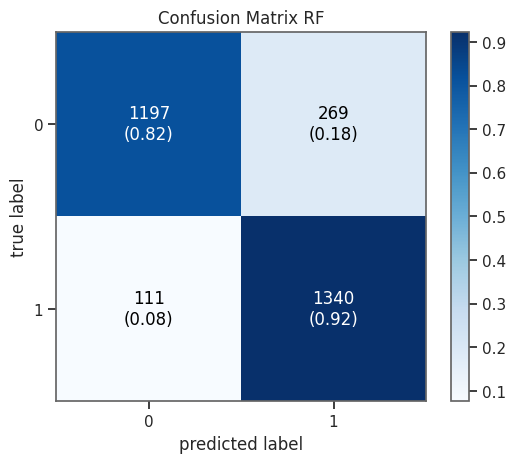

Alors dans la classe 0,sur 1466 individu,le modèle réussit à faire un bon classement sur 1197  individu et une erreur sur 269 
  Dans la classe 1,sur 1451 individus le modèle fait un bon classement sur 1340  individu et une erreur sur 1197


In [ ]:
matrice_RF = confusion_matrix(Y_test, best_Y_test_pred_RF)
# Affichage de la matrice de confusion avec titre
fig, ax = plot_confusion_matrix(conf_mat=matrice_RF,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Confusion Matrix RF")
plt.show()
print("Alors dans la classe 0,sur",Y_test.value_counts()[0],
      "individu,le modèle réussit à faire un bon classement sur", matrice_RF[0,0],
      " individu et une erreur sur", matrice_RF[0,1], "\n  Dans la classe 1,sur",Y_test.value_counts()[1],
      "individus le modèle fait un bon classement sur", matrice_RF[1,1],
      " individu et une erreur sur", matrice_RF[0,0] )

***taux de bon et de mauvais classement***

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_RF[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_RF[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_RF[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_RF[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 81.65 %
Taux de mauvais classement (Classe 0 - Sans AVC): 18.35 %
Taux de bon classement (Classe 1 - Avec AVC): 92.35 %
Taux de mauvais classement (Classe 1 - Avec AVC): 7.65 %


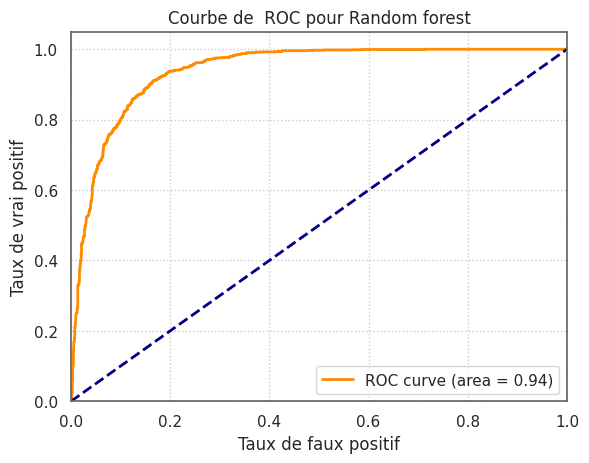

In [ ]:
# Courbe ROC
fpr_RF, tpr_RF, thresholds_RF = roc_curve(Y_test, best_modele_RF.predict_proba(X_test)[:, 1])
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe de  ROC pour Random forest')
plt.legend(loc="lower right")
plt.show()

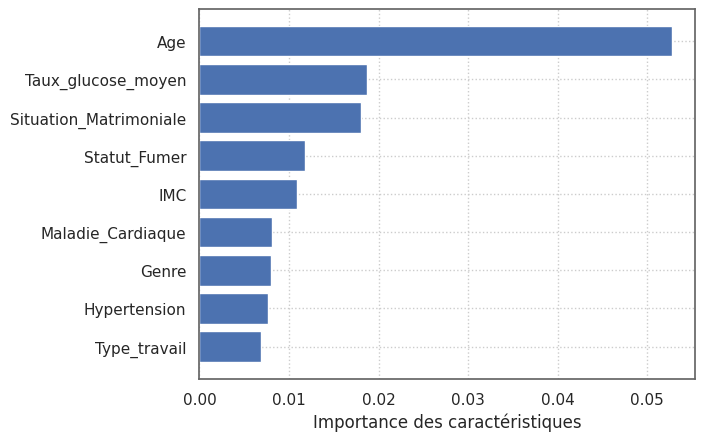

In [ ]:

result = permutation_importance(best_modele_RF, X, Y, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importance des caractéristiques")
plt.show()

## SupportVectorMachine(SVM)

#### Optimisation des paramètres

In [ ]:
# initialisation du modele
modele_SVC = SVC(probability=True)
# optimisation des parametres
param_grid_SVC  = ({'C' : [0.1, 1, 10, 100],
                  'kernel' : ['rbf'],
                  'gamma' : ['scale', 0.01, 0.1, 1]})
# modele optimal
modele_opt_SVC = GridSearchCV(modele_SVC, param_grid_SVC,
                            cv = 5
                            )
## Entrainement du modèle
modele_opt_SVC.fit(X_train,Y_train)
# parametre optimaux
best_param = modele_opt_SVC.best_params_
print("VOILA LES MEILLEURS PARAMÉTRES :",best_param)
# best modele
best_modele_SVC = modele_opt_SVC.best_estimator_
best_modele_SVC

VOILA LES MEILLEURS PARAMÉTRES : {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=100, gamma=1, probability=True)

#### Prédiction

In [ ]:
# Prédiction sur la base test
best_Y_test_pred_SVC = best_modele_SVC.predict(X_test)
best_Y_test_pred_SVC

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:

# Prédiction sur la base train
best_Y_train_pred_SVC = best_modele_SVC.predict(X_train)
best_Y_train_pred_SVC

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# prediction en proba sur la base train
Y_pred_train_proba_SVC = best_modele_SVC.predict_proba(X_train)
Y_pred_train_proba_SVC

array([[8.63598684e-02, 9.13640132e-01],
       [1.77240594e-01, 8.22759406e-01],
       [9.02391109e-01, 9.76088912e-02],
       ...,
       [1.27051247e-01, 8.72948753e-01],
       [9.99702194e-01, 2.97806323e-04],
       [1.32788989e-01, 8.67211011e-01]])

## Mesures de performance

#### Accuracy

In [ ]:
# Sur la base test
Acc_test_SVC = accuracy_score(Y_test, best_Y_test_pred_SVC) * 100
Acc_train_SVC = accuracy_score(Y_train, best_Y_train_pred_SVC) * 100
# Sur la base train
print("Accuracy sur train:", Acc_train_SVC, "%")
print("Accuracy sur test:", Acc_test_SVC, "%")


Accuracy sur train: 96.57604702424688 %
Accuracy sur test: 91.7723688721289 %


#### F1 score

In [ ]:
# Sur la base test et train
F1_score_test_SVC = f1_score(Y_test, best_Y_test_pred_SVC, average='weighted') * 100
F1_score_train_SVC = f1_score(Y_train, best_Y_train_pred_SVC, average='weighted') * 100
# Sur la base train
print("F1_score sur train:", F1_score_train_SVC, "%")
print("F1_score sur test:", F1_score_test_SVC, "%")


F1_score sur train: 96.57400009921112 %
F1_score sur test: 91.76016955331053 %


#### Précision

In [ ]:
# Sur la base test et train
precision_score_test_SVC = precision_score(Y_test, best_Y_test_pred_SVC, average='weighted') * 100
precision_score_train_SVC = precision_score(Y_train, best_Y_train_pred_SVC, average='weighted') * 100
# Sur la base train
print("Précision sur train:", precision_score_train_SVC, "%")
print("Précision sur test:", precision_score_test_SVC, "%")


Précision sur train: 96.67764691398 %
Précision sur test: 92.06033670088134 %


#### Recall

In [ ]:
# Sur la base test et train
recall_score_test_SVC = recall_score(Y_test, best_Y_test_pred_SVC, average='weighted') * 100
recall_score_train_SVC = recall_score(Y_train, best_Y_train_pred_SVC, average='weighted') * 100
# Sur la base train
print("Recall sur train:", recall_score_train_SVC, "%")
print("Recall sur test:", recall_score_test_SVC, "%")


Recall sur train: 96.57604702424688 %
Recall sur test: 91.7723688721289 %


#### Matrice de confusion

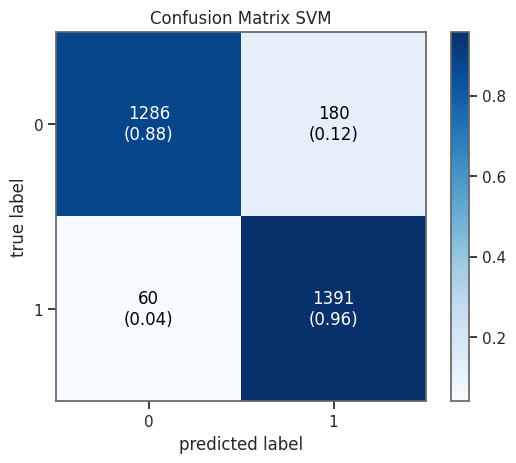

Alors dans la classe 0,sur 1466 individu,le modèle réussit à faire un bon classement sur 1286  individu et une erreur sur 180 
  Dans la classe 1,sur 1451 individus le modèle fait un bon classement sur 1391  individu et une erreur sur 1286


In [ ]:
matrice_SVM = confusion_matrix(Y_test, best_Y_test_pred_SVC)
# Affichage de la matrice de confusion avec titre
fig, ax = plot_confusion_matrix(conf_mat=matrice_SVM,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Confusion Matrix SVM")
plt.show()
print("Alors dans la classe 0,sur",Y_test.value_counts()[0],
      "individu,le modèle réussit à faire un bon classement sur", matrice_SVM[0,0],
      " individu et une erreur sur", matrice_SVM[0,1], "\n  Dans la classe 1,sur",Y_test.value_counts()[1],
      "individus le modèle fait un bon classement sur", matrice_SVM[1,1],
      " individu et une erreur sur", matrice_SVM[0,0] )

***taux de bon et de mauvais classement***

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_SVM[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_SVM[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_SVM[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_SVM[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 87.72 %
Taux de mauvais classement (Classe 0 - Sans AVC): 12.28 %
Taux de bon classement (Classe 1 - Avec AVC): 95.86 %
Taux de mauvais classement (Classe 1 - Avec AVC): 4.14 %


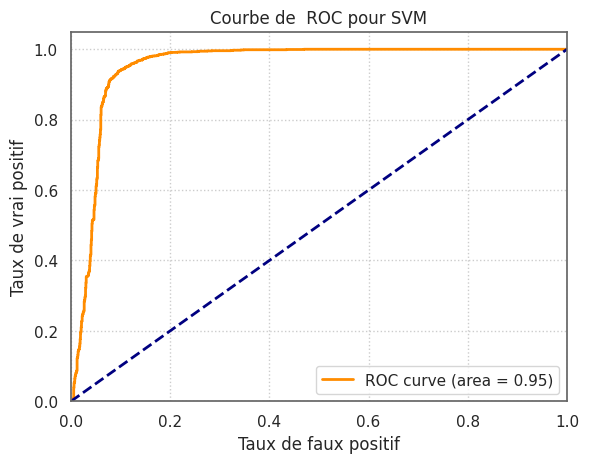

In [ ]:
# Courbe ROC
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(Y_test, best_modele_SVC.predict_proba(X_test)[:, 1])
roc_auc_SVC = auc(fpr_SVC, tpr_SVC)

plt.figure()
plt.plot(fpr_SVC, tpr_SVC, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_SVC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe de  ROC pour SVM')
plt.legend(loc="lower right")
plt.show()

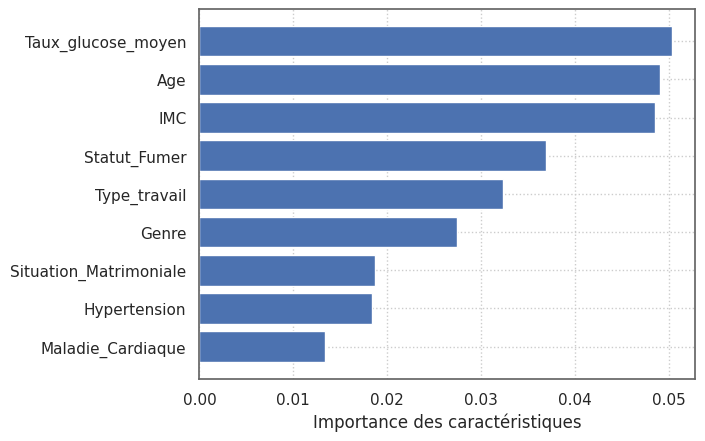

In [ ]:

result = permutation_importance(best_modele_SVC, X, Y, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importance des caractéristiques")
plt.show()

## K-plusprochesvoisins(KNN)

#### optimisation des parametres

In [ ]:
# Définir le modèle et les paramètres
#modele_KNN=KNeighborsClassifier()
#param_grid = [{
 #   'n_neighbors': [5, 7, 9, 11],
  #  'weights': ['uniform', 'distance'],  # Poids uniformes ou pondérés
   #          'metric':['euclidean','manhattan']
    #         }
#]
# Créer l'objet GridSearchCV
#modele_opt_KNN = GridSearchCV(modele_KNN,# modèle initialisé
 #                        param_grid, # grilles de parametre du modèle
  #                       cv=10, # cross--validation
   #                      verbose=1 #longueur
    #                     )
# Entrainement du modèle
#modele_opt_KNN.fit(X_train,Y_train)
# parametre optimaux
#best_param = modele_opt_KNN.best_params_
#print("VOILA LES MEILLEURS PARAMÉTRES :",best_param)
# meilleur modèle
#best_modele_KNN = modele_opt_KNN.best_estimator_
#best_modele_KNN

In [ ]:
best_modele_KNN = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')
best_modele_KNN.fit(X_train, Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
#best_modele_KNN = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='manhattan')
#best_modele_KNN.fit(X_train, Y_train)


#### Prédiction

In [ ]:
# Prédiction sur la base test
best_Y_test_pred_KNN = best_modele_KNN.predict(X_test)
best_Y_test_pred_KNN

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# Prédiction sur la base train
best_Y_train_pred_KNN = best_modele_KNN.predict(X_train)
best_Y_train_pred_KNN

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# prediction en proba sur la base test
Y_pred_train_proba_KNN =best_modele_KNN.predict_proba(X_test)
Y_pred_train_proba_KNN

array([[0.14285714, 0.85714286],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## Mesure de performance

#### Accuracy

In [ ]:
# Sur la base test
Acc_test_KNN = accuracy_score(Y_test, best_Y_test_pred_KNN) * 100
Acc_train_KNN = accuracy_score(Y_train, best_Y_train_pred_KNN) * 100
# Sur la base train
print("Accuracy sur train:", Acc_train_KNN, "%")
print("Accuracy sur test:", Acc_test_KNN, "%")


Accuracy sur train: 89.33137398971344 %
Accuracy sur test: 87.35001714089819 %


#### F1 Score

In [ ]:
# Sur la base test et train
F1_score_test_KNN = f1_score(Y_test, best_Y_test_pred_KNN, average='weighted') * 100
F1_score_train_KNN = f1_score(Y_train, best_Y_train_pred_KNN, average='weighted') * 100
# Sur la base train
print("F1_score sur train:", F1_score_train_KNN, "%")
print("F1_score sur test:", F1_score_test_KNN, "%")


F1_score sur train: 89.24452031458395 %
F1_score sur test: 87.21720776325233 %


#### Précision

In [ ]:
# Sur la base test et train
precision_score_test_KNN = precision_score(Y_test, best_Y_test_pred_KNN, average='weighted') * 100
precision_score_train_KNN = precision_score(Y_train, best_Y_train_pred_KNN, average='weighted') * 100
# Sur la base train
print("Précision sur train:", precision_score_train_KNN, "%")
print("Précision sur test:", precision_score_test_KNN, "%")


Précision sur train: 90.60784379234124 %
Précision sur test: 89.06846256454828 %


#### Recall

In [ ]:
# Sur la base test et train
recall_score_test_KNN = recall_score(Y_test, best_Y_test_pred_KNN, average='weighted') * 100
recall_score_train_KNN = recall_score(Y_train, best_Y_train_pred_KNN, average='weighted') * 100
# Sur la base train
print("Recall sur train:", recall_score_train_KNN, "%")
print("Recall sur test:", recall_score_test_KNN, "%")


Recall sur train: 89.33137398971344 %
Recall sur test: 87.35001714089819 %


#### Matrice de confusion

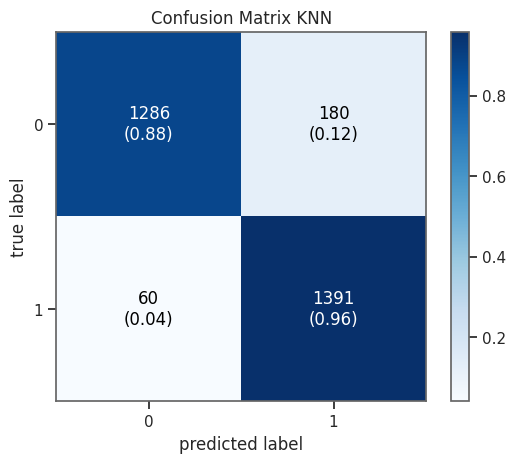

Alors dans la classe 0,sur 1466 individu,le modèle réussit à faire un bon classement sur 1286  individu et une erreur sur 180 
  Dans la classe 1,sur 1451 individus le modèle fait un bon classement sur 1391  individu et une erreur sur 1286


In [ ]:
matrice_KNN = confusion_matrix(Y_test, best_Y_test_pred_SVC)
# Affichage de la matrice de confusion avec titre
fig, ax = plot_confusion_matrix(conf_mat=matrice_KNN,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Confusion Matrix KNN")
plt.show()
print("Alors dans la classe 0,sur",Y_test.value_counts()[0],
      "individu,le modèle réussit à faire un bon classement sur", matrice_KNN[0,0],
      " individu et une erreur sur", matrice_KNN[0,1], "\n  Dans la classe 1,sur",Y_test.value_counts()[1],
      "individus le modèle fait un bon classement sur", matrice_KNN[1,1],
      " individu et une erreur sur", matrice_KNN[0,0] )

***taux de bon et de mauvais classement***

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_KNN[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_KNN[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_KNN[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_KNN[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 87.72 %
Taux de mauvais classement (Classe 0 - Sans AVC): 12.28 %
Taux de bon classement (Classe 1 - Avec AVC): 95.86 %
Taux de mauvais classement (Classe 1 - Avec AVC): 4.14 %


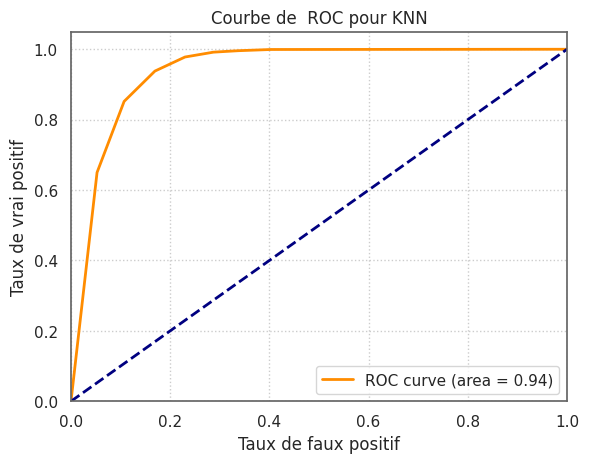

In [ ]:
# Courbe ROC
fpr_KNN, tpr_KNN, thresholds_SVC = roc_curve(Y_test, best_modele_KNN.predict_proba(X_test)[:, 1])
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe de  ROC pour KNN')
plt.legend(loc="lower right")
plt.show()

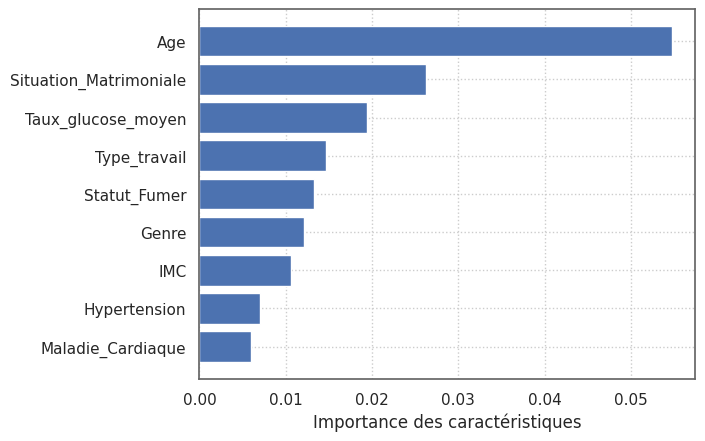

In [ ]:


result = permutation_importance(best_modele_KNN, X, Y, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importance des caractéristiques")
plt.show()

## Grandient Boosting

In [ ]:
# initialisation du modele
modele_GB = GradientBoostingClassifier()
param_grid_GB = ({
    'n_estimators': [100,200],
    'max_depth': [2,3,4,5],
    'learning_rate': [0.1,0.2],  # taux d'apprentissage
    'loss': ['log_loss'], # fonction d'erreur
    'subsample': [0.8, 1.0]        #Stochastic GB pour réduire la variance
     })
# modele optimal
modele_opt_GB = GridSearchCV(modele_GB,param_grid_GB,
                                      cv = 5,
                                      scoring='roc_auc')

#### Entrainement du modèle

In [ ]:
modele_opt_GB.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'loss': ['log_loss'],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [ ]:
# parametres optimaux
best_param_GB = modele_opt_GB.best_params_
print("VOILA LES MEILLEURS PARAMÉTRES :",best_param_GB)
# best modele
best_modele_GB = modele_opt_GB.best_estimator_
best_modele_GB

VOILA LES MEILLEURS PARAMÉTRES : {'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           subsample=0.8)

#### Prédiction

In [ ]:
 best_Y_test_pred_GB = best_modele_GB.predict(X_test)
 best_Y_test_pred_GB

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
 best_Y_train_pred_GB = best_modele_GB.predict(X_train)
 best_Y_train_pred_GB

array([1, 1, 0, ..., 1, 0, 1])

## Mesure de performance

#### Accuracy

In [ ]:
# Sur la base test
Acc_test_GB = accuracy_score(Y_test, best_Y_test_pred_GB) * 100
Acc_train_GB = accuracy_score(Y_train, best_Y_train_pred_GB) * 100
# Sur la base train
print("Accuracy sur train:", Acc_train_GB, "%")
print("Accuracy sur test:", Acc_test_GB, "%")


Accuracy sur train: 99.8383541513593 %
Accuracy sur test: 95.33767569420638 %


#### F1 score

In [ ]:
# Sur la base test et train
F1_score_test_GB = f1_score(Y_test, best_Y_test_pred_GB, average='weighted') * 100
F1_score_train_GB = f1_score(Y_train, best_Y_train_pred_GB, average='weighted') * 100
# Sur la base train
print("F1_score sur train:", F1_score_train_GB, "%")
print("F1_score sur test:", F1_score_test_GB, "%")


F1_score sur train: 99.83835430494865 %
F1_score sur test: 95.33576567846377 %


#### Précision

In [ ]:
# Sur la base test et train
precision_score_test_GB = precision_score(Y_test, best_Y_test_pred_GB, average='weighted') * 100
precision_score_train_GB = precision_score(Y_train, best_Y_train_pred_GB, average='weighted') * 100
# Sur la base train
print("Précision sur train:", precision_score_train_GB, "%")
print("Précision sur test:", precision_score_test_GB, "%")


Précision sur train: 99.83887620195677 %
Précision sur test: 95.39454615249433 %


#### Recall

In [ ]:
# Sur la base test et train
recall_score_test_GB = recall_score(Y_test, best_Y_test_pred_GB, average='weighted') * 100
recall_score_train_GB = recall_score(Y_train, best_Y_train_pred_GB, average='weighted') * 100
# Sur la base train
print("Recall sur train:", recall_score_train_GB, "%")
print("Recall sur test:", recall_score_test_GB, "%")


Recall sur train: 99.8383541513593 %
Recall sur test: 95.33767569420638 %


#### Matrice de confusion

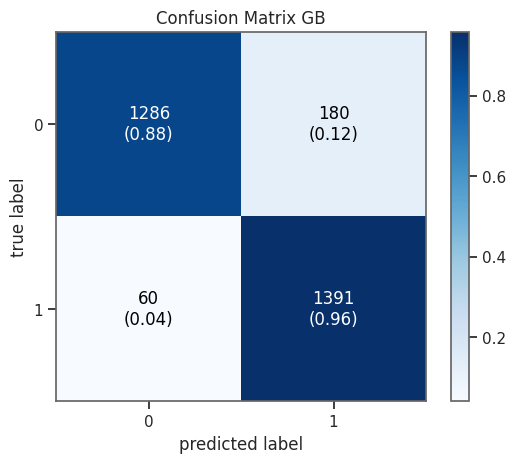

Alors dans la classe 0,sur 1466 individu,le modèle réussit à faire un bon classement sur 1286  individu et une erreur sur 180 
  Dans la classe 1,sur 1451 individus le modèle fait un bon classement sur 1391  individu et une erreur sur 1286


In [ ]:
matrice_GB = confusion_matrix(Y_test, best_Y_test_pred_SVC)
# Affichage de la matrice de confusion avec titre
fig, ax = plot_confusion_matrix(conf_mat=matrice_GB,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Confusion Matrix GB")
plt.show()
print("Alors dans la classe 0,sur",Y_test.value_counts()[0],
      "individu,le modèle réussit à faire un bon classement sur", matrice_GB[0,0],
      " individu et une erreur sur", matrice_GB[0,1], "\n  Dans la classe 1,sur",Y_test.value_counts()[1],
      "individus le modèle fait un bon classement sur", matrice_GB[1,1],
      " individu et une erreur sur", matrice_GB[0,0] )

***taux de bon et de mauvais classement***

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_GB[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_GB[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_GB[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_GB[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 87.72 %
Taux de mauvais classement (Classe 0 - Sans AVC): 12.28 %
Taux de bon classement (Classe 1 - Avec AVC): 95.86 %
Taux de mauvais classement (Classe 1 - Avec AVC): 4.14 %


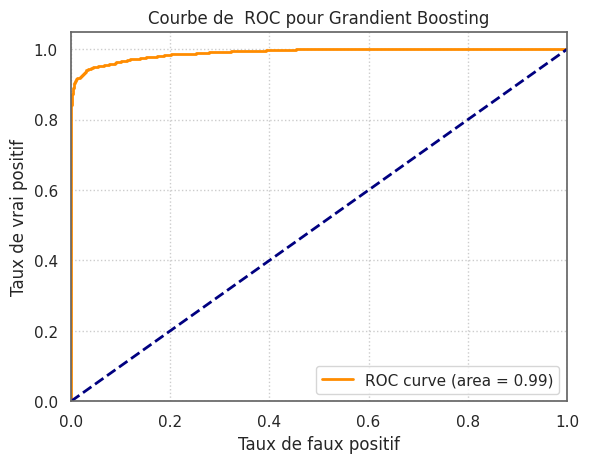

In [ ]:
# Courbe ROC
fpr_GB, tpr_GB, thresholds_SVC = roc_curve(Y_test, best_modele_GB.predict_proba(X_test)[:, 1])
roc_auc_GB = auc(fpr_GB, tpr_GB)

plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_GB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe de  ROC pour Grandient Boosting')
plt.legend(loc="lower right")
plt.show()

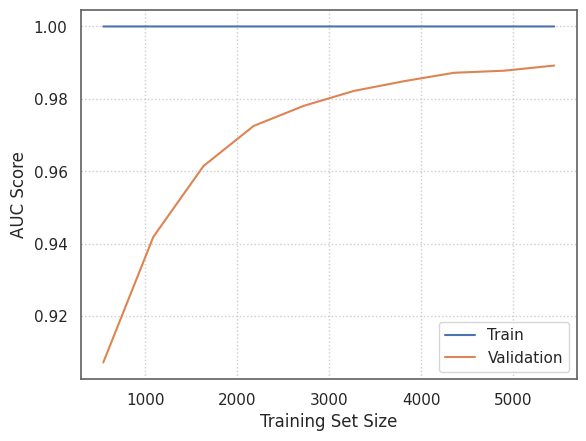

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_modele_GB, X=X_train, y=Y_train, cv=5,
    scoring="roc_auc", train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation")
plt.xlabel("Training Set Size")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

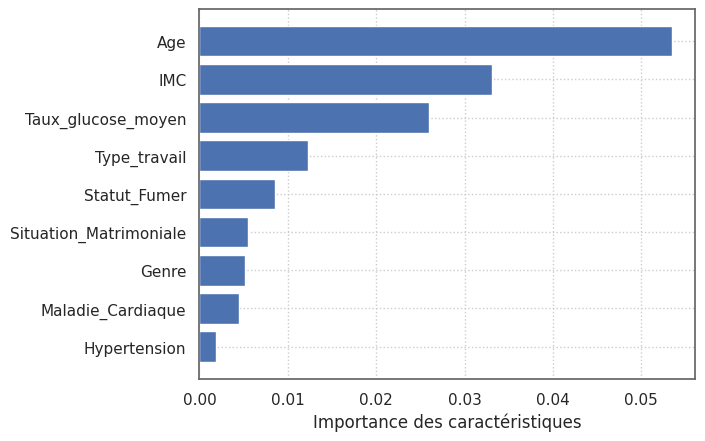

In [ ]:

result = permutation_importance(best_modele_GB, X, Y, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importance des caractéristiques")
plt.show()

## Réseau de Neurone

In [ ]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping

#model_base = Sequential([
 #   Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  #  BatchNormalization(),
   # Dropout(0.3),  # Réduit le surajustement
   # Dense(64, activation='relu'),
   # BatchNormalization(),
   # Dropout(0.2),
   # Dense(32, activation='relu'),
   # BatchNormalization(),
   # Dense(1, activation='sigmoid')
#])


***Création d'un modèle de base avec 4 couches cachées***

In [ ]:
# Conversion en float32
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model_base = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Construction et entraînement du modèle
model_base.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])


history_base = model_base.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6275 - loss: 0.6948 - val_accuracy: 0.7710 - val_loss: 0.5214
Epoch 2/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7634 - loss: 0.5099 - val_accuracy: 0.7971 - val_loss: 0.4362
Epoch 3/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7790 - loss: 0.4846 - val_accuracy: 0.8162 - val_loss: 0.4034
Epoch 4/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7810 - loss: 0.4614 - val_accuracy: 0.8214 - val_loss: 0.3942
Epoch 5/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7947 - loss: 0.4461 - val_accuracy: 0.8248 - val_loss: 0.3868
Epoch 6/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8013 - loss: 0.4438 - val_accuracy: 0.8224 - val_loss: 0.3907
Epoch 7/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8099 - loss: 0.4264 - val_accuracy: 0.8238 - val_loss: 0.3847
Epoch 8/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8105 - loss: 0.4260 - val_ac

Prédiction

In [ ]:
# Obtenir les prédictions
y_train_pred_prob = model_base.predict(X_train)
y_test_pred_prob = model_base.predict(X_test)

# Convertir les probabilités en classes (0 ou 1)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Mesure de performance

Accuracy

In [ ]:
train_accuracy = accuracy_score(Y_train, y_train_pred)* 100
test_accuracy = accuracy_score(Y_test, y_test_pred)* 100
print(f"Accuracy sur la base train: {train_accuracy:.4f}")
print(f"Accuracy sur la base test: {test_accuracy:.4f}")


Accuracy sur la base train: 90.9037
Accuracy sur la base test: 89.1670


Précision

In [ ]:
train_precision = precision_score(Y_train, y_train_pred)* 100
test_precision = precision_score(Y_test, y_test_pred)* 100
print(f"Precision sur la base train: {train_precision:.4f}")
print(f"Precision sur la base test: {test_precision:.4f}")

Precision sur la base train: 85.7179
Precision sur la base test: 83.7597


F1-score

In [ ]:
train_f1 = f1_score(Y_train, y_train_pred)* 100
test_f1 = f1_score(Y_test, y_test_pred)* 100
print(f"F1-score sur la base train: {train_f1:.4f}")
print(f"F1-score sur la base test: {test_f1:.4f}")

F1-score sur la base train: 91.5402
F1-score sur la base test: 89.9106


Recall

In [ ]:
train_recall = recall_score(Y_train, y_train_pred)* 100
test_recall = recall_score(Y_test, y_test_pred)* 100
print(f"Recall sur la base train: {train_recall:.4f}")
print(f"Recall sur la base test: {test_recall:.4f}")


Recall sur la base train: 98.2111
Recall sur la base test: 97.0365


Matrice de confusion

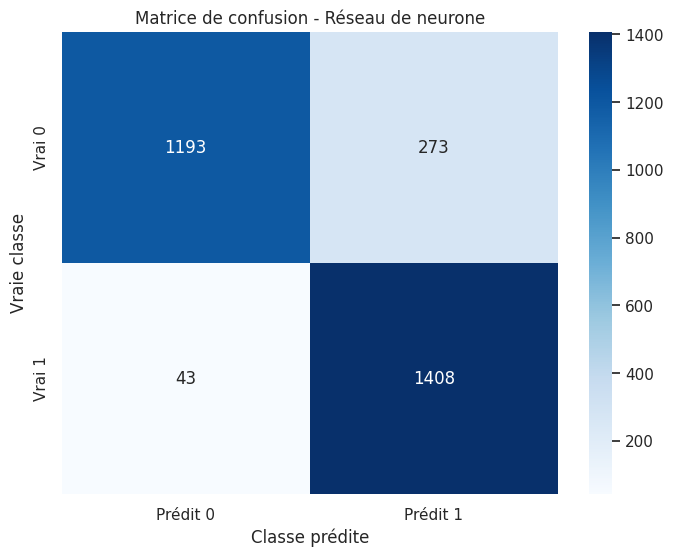

In [ ]:
# Matrice de confusion pour le test
matrice_RN = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_RN, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prédit 0', 'Prédit 1'],
            yticklabels=['Vrai 0', 'Vrai 1'])
plt.title('Matrice de confusion - Réseau de neurone')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

Taux de bon classement

In [ ]:
print(f"Taux de bon classement (Classe 0 - Sans AVC): {matrice_RN[0, 0] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 0 - Sans AVC): {matrice_RN[0, 1] / Y_test.value_counts()[0] * 100:.2f} %")
print(f"Taux de bon classement (Classe 1 - Avec AVC): {matrice_RN[1, 1] / Y_test.value_counts()[1] * 100:.2f} %")
print(f"Taux de mauvais classement (Classe 1 - Avec AVC): {matrice_RN[1, 0] / Y_test.value_counts()[1] * 100:.2f} %")


Taux de bon classement (Classe 0 - Sans AVC): 81.38 %
Taux de mauvais classement (Classe 0 - Sans AVC): 18.62 %
Taux de bon classement (Classe 1 - Avec AVC): 97.04 %
Taux de mauvais classement (Classe 1 - Avec AVC): 2.96 %


Courbe de ROC

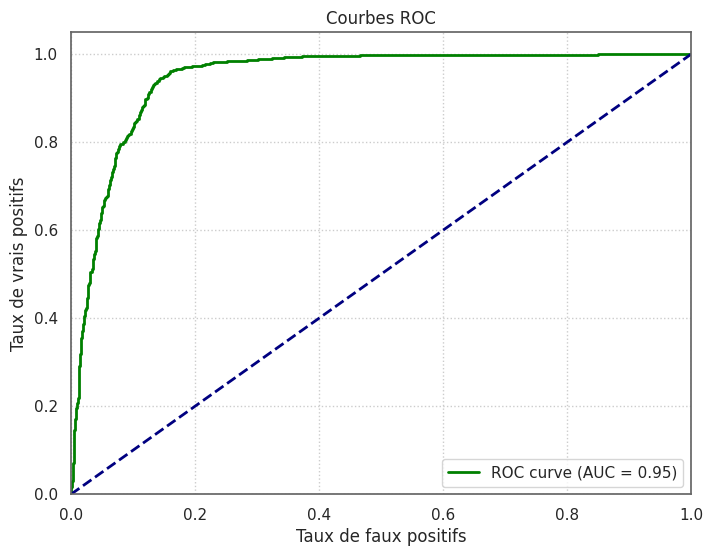

In [ ]:
# Calcul des métriques ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred_prob)
auc_score = roc_auc_score(Y_test, y_test_pred_prob)

# Visualisation comparative des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

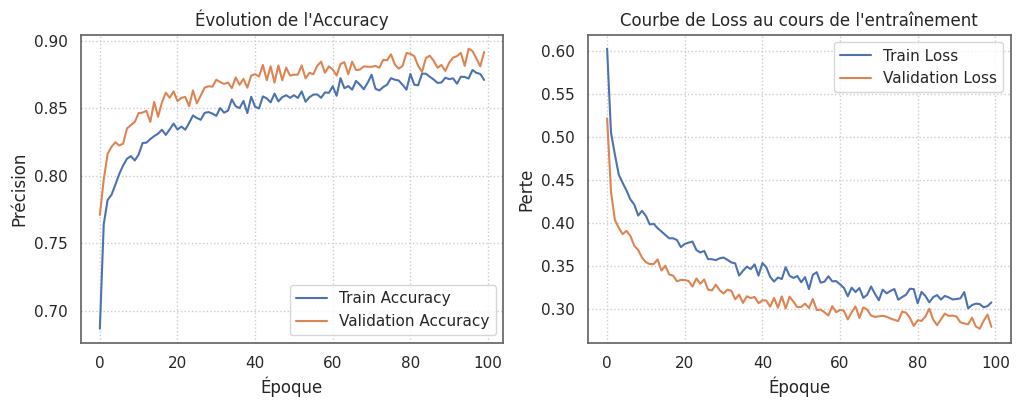

In [ ]:
# Courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title("Courbe de Loss au cours de l'entraînement")
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [ ]:
modele = ["RL","AD","RF","SVM","KNN","GB","RN"]

accuracy_scores=[Acc_test_RL,Acc_test_AD, Acc_test_RF, Acc_test_SVC,Acc_test_KNN,Acc_test_GB,test_accuracy]

matrice_test=[matrice_RL,matrice_AD,matrice_RF,matrice_SVM,matrice_KNN,matrice_GB,matrice_RN]

precision_scores=[precision_score_test_RL,precision_score_test_AD,precision_score_test_RF,
                                        precision_score_test_SVC,precision_score_test_KNN,precision_score_test_GB, test_precision]

recall_scores=[recall_score_test_RL,recall_score_test_AD,recall_score_test_RF,recall_score_test_SVC,recall_score_test_KNN,recall_score_test_GB,test_recall]

F1_scores=[F1_score_test_RL,F1_score_test_AD,F1_score_test_RF,F1_score_test_SVC,F1_score_test_KNN,F1_score_test_GB,test_f1]

metrics_df = pd.DataFrame({
    "Modèle": modele,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": F1_scores
})

# Arrondir pour lisibilité
metrics_df[["Accuracy", "Precision", "Recall", "F1 Score"]] = metrics_df[["Accuracy", "Precision", "Recall", "F1 Score"]].round(2)
# Triez les résultats en ordre décroissant
metrics_df = metrics_df.sort_values(by="Recall", ascending=False)
# Affichez les résultats
print(metrics_df)


  Modèle  Accuracy  Precision  Recall  F1 Score
6     RN     89.17      83.76   97.04     89.91
5     GB     95.34      95.39   95.34     95.34
3    SVM     91.77      92.06   91.77     91.76
4    KNN     87.35      89.07   87.35     87.22
2     RF     86.97      87.42   86.97     86.94
1     AD     84.16      84.35   84.16     84.14
0     RL     78.03      78.19   78.03     78.00


In [ ]:
taux_bon_classement_0 = {
    "Regression Logistique": matrice_RL[0, 0] / Y_test.value_counts()[0] * 100,
    "Arbre de Décision": matrice_AD[0, 0] / Y_test.value_counts()[0] * 100,
    "Random Forest": matrice_RF[0, 0] / Y_test.value_counts()[0] * 100,
    "SVM": matrice_SVM[0, 0] / Y_test.value_counts()[0] * 100,
    "KNN": matrice_KNN[0, 0] / Y_test.value_counts()[0] * 100,
    "Gradient Boosting": matrice_GB[0, 0] / Y_test.value_counts()[0] * 100,
    "Réseau de neurone": matrice_RN[0, 0] / Y_test.value_counts()[0] * 100
}

taux_bon_classement_1 = {
    "Regression Logistique": matrice_RL[1, 1] / Y_test.value_counts()[1] * 100,
    "Arbre de Décision": matrice_AD[1, 1] / Y_test.value_counts()[1] * 100,
    "Random Forest": matrice_RF[1, 1] / Y_test.value_counts()[1] * 100,
    "SVM": matrice_SVM[1, 1] / Y_test.value_counts()[1] * 100,
    "KNN": matrice_KNN[1, 1] / Y_test.value_counts()[1] * 100,
    "Gradient Boosting": matrice_GB[1, 1] / Y_test.value_counts()[1] * 100,
    "Réseau de neurone": matrice_RN[1, 1] / Y_test.value_counts()[1] * 100

}

taux_mal_classement_0 = {
    "Regression Logistique": matrice_RL[0, 1] / Y_test.value_counts()[0] * 100,
    "Arbre de Décision": matrice_AD[0, 1] / Y_test.value_counts()[0] * 100,
    "Random Forest": matrice_RF[0, 1] / Y_test.value_counts()[0] * 100,
    "SVM": matrice_SVM[0, 1] / Y_test.value_counts()[0] * 100,
    "KNN": matrice_KNN[0, 1] / Y_test.value_counts()[0] * 100,
    "Gradient Boosting": matrice_GB[0, 1] / Y_test.value_counts()[0] * 100,
    "Réseau de neurone": matrice_RN[0, 1] / Y_test.value_counts()[0] * 100

}

taux_mal_classement_1 = {
    "Regression Logistique": matrice_RL[1, 0] / Y_test.value_counts()[1] * 100,
    "Arbre de Décision": matrice_AD[1, 0] / Y_test.value_counts()[1] * 100,
    "Random Forest": matrice_RF[1, 0] / Y_test.value_counts()[1] * 100,
    "SVM": matrice_SVM[1, 0] / Y_test.value_counts()[1] * 100,
    "KNN": matrice_KNN[1, 0] / Y_test.value_counts()[1] * 100,
    "Gradient Boosting": matrice_GB[1, 0] / Y_test.value_counts()[1] * 100,
    "Réseau de neurone": matrice_RN[1, 0] / Y_test.value_counts()[1] * 100

}


summary_classification_rates = pd.DataFrame({
    "Modèle": list(taux_bon_classement_0.keys()),
    "Taux Bon Classement (Classe 0)": list(taux_bon_classement_0.values()),
    "Taux Mal Classement (Classe 0)": list(taux_mal_classement_0.values()),
    "Taux Bon Classement (Classe 1)": list(taux_bon_classement_1.values()),
    "Taux Mal Classement (Classe 1)": list(taux_mal_classement_1.values()),

})

# Arrondir pour lisibilité
summary_classification_rates[['Taux Bon Classement (Classe 0)', 'Taux Mal Classement (Classe 0)', 'Taux Bon Classement (Classe 1)', 'Taux Mal Classement (Classe 1)']] = summary_classification_rates[['Taux Bon Classement (Classe 0)', 'Taux Mal Classement (Classe 0)', 'Taux Bon Classement (Classe 1)', 'Taux Mal Classement (Classe 1)']].round(2)


print("\n--- Résumé des Taux de Classement par Modèle ---")
display(summary_classification_rates)



--- Résumé des Taux de Classement par Modèle ---


Modèle  Taux Bon Classement (Classe 0)  \
0  Regression Logistique                           74.49   
1      Arbre de Décision                           80.63   
2          Random Forest                           81.65   
3                    SVM                           87.72   
4                    KNN                           87.72   
5      Gradient Boosting                           87.72   
6      Réseau de neurone                           81.38   

   Taux Mal Classement (Classe 0)  Taux Bon Classement (Classe 1)  \
0                           25.51                           81.60   
1                           19.37                           87.73   
2                           18.35                           92.35   
3                           12.28                           95.86   
4                           12.28                           95.86   
5                           12.28                           95.86   
6                           18.62                           97.04   

   Taux Mal Classement (Classe 1)  
0                           18.40  
1                           12.27  
2                            7.65  
3                            4.14  
4                            4.14  
5                            4.14  
6                            2.96